#**Cancer Dataset Prediction**

Utilizing a unique oncology dataset, you will develop a model to predict if patients received metastatic cancer diagnosis within 90 days of screening.

https://www.kaggle.com/competitions/widsdatathon2024-challenge1/data


**Disclaimer!!**  
The iterative modeling process for this project was done by multiple members of the group, so that specific section will be split based on the individual work done by each group member, keeping all of the original variable names and documentation to showcase the different approaches done by each member. Each member's code in the iterative modeling section was appended to the original preprocessing file for final submission.

###**Exploratory Data Analysis (EDA)**

**Importing Packages and the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("training.csv")

**Pre-Analysis of Dataset**

In [ ]:
df.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


From the get-go, we see that there are different types of variables and some null and missing values. We also see that there are some redundant columns that we may not need later.

In [ ]:
df.shape

# 12906 rows and 83 columns

(12906, 83)

In [ ]:
# Feature names for easier reference
dfcols= df.columns
print(dfcols)

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [ ]:
df.dtypes

,0
patient_id,int64
patient_race,object
payer_type,object
patient_state,object
patient_zip3,int64
...,...
veteran,float64
Ozone,float64
PM25,float64
N02,float64


In [ ]:
# Show all rows and columns settings on pandas to display all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Let's also calculate the percentage of missing values in the whole dataset

total_rows = len(df)
missing_values = df.isnull().sum()
missing_percent = (missing_values / total_rows) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent.round(2)
})

print(missing_data)

                                       Missing Values  Percent Missing
patient_id                                          0             0.00
patient_race                                     6385            49.47
payer_type                                       1803            13.97
patient_state                                      51             0.40
patient_zip3                                        0             0.00
patient_age                                         0             0.00
patient_gender                                      0             0.00
bmi                                              8965            69.46
breast_cancer_diagnosis_code                        0             0.00
breast_cancer_diagnosis_desc                        0             0.00
metastatic_cancer_diagnosis_code                    0             0.00
metastatic_first_novel_treatment                12882            99.81
metastatic_first_novel_treatment_type           12882            99.81
Region

In [ ]:
df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000,12905.000000,12902.000000,12905.000000,1.290200e+04,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,12.862036,12.066978,13.441936,12.620903,7.653389,3.996221,50.095180,49.904900,47.680767,12.670532,33.834497,5.813387,3.202241,51.848542,74374.366908,3.269565,2.514251,4.142938,3.929804,4.071951,8.401565,11.561127,16.892327,12.664050,15.827931,16.723986,32.551917,36520.522622,65.994359,7575.709216,3.398172e+05,1237.303024,31.337751,11.989616,27.556060,28.924532,19.273300,12.257566,31.530866,43.385130,61.619846,5.952955,13.214106,1.861784,69.718255,11.447491,5.470315,0.900217,0.139318,5.682117,6.641799,18.459019,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,2.324922,1.248499,1.643221,2.571528,2.147138,1.236823,1.656640,1.656594,7.491146,2.047935,8.019483,1.537171,0.224519,6.807659,20712.590100,1.448217,1.341073,1.767872,1.445416,1.345323,2.209765,2.577412,2.719725,1.831453,3.175040,8.940311,11.128674,8195.162293,14.117453,4916.905130,2.516976e+05,427.836972,4.775799,5.143849,7.992479,4.890567,6.173655,5.939814,11.632189,4.636082,5.945359,1.947654,3.411691,3.056104,17.960882,12.532624,6.735789,2.499784,0.505940,6.252393,3.544494,17.030894,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,1.500000,0.800000,0.000000,0.200000,0.000000,0.000000,39.725000,38.400000,0.900000,0.200000,13.440000,0.000000,2.550370,19.312121,29222.000000,0.750000,0.361538,1.015385,1.027778,1.100000,2.650000,1.700000,4.950000,4.733333,4.288889,0.840000,5.692593,4316.000000,15.850000,0.000000,6.062900e+04,448.400000,17.415789,0.000000,0.000000,7.200000,2.465714,2.094118,7.048837,23.914706,30.700000,0.823077,2.262963,0.000000,14.495652,0.060976,0.000000,0.000000,0

There are so many columns to look at so we need to remember our goal: predict if patients received metastatic cancer diagnosis within 90 days of screening. This means that we should identify which columns are relevant, non-redundant, and won't leak information about our target variable. From our data, we see that the columns are split into patient-specific features and community/socioeconomic features which plays a very important role (unfortunately) on if a patient was diagnosed with metastatic cancer before or after 90 days. The overall statistics of our numerical variables seem to make sense. As of now, the columns I am thinking of removing are:
- Patient_id
- Patient_gender (if all patients are women then it is redundant)
- breast_cancer_diagnosis_desc
- metastatic_first_novel_treatment
- metastatic_first_novel_treatment_type
- BMI (there may be too many missing variables but we will see ~69.46%)
- Patient_race (there may be too many missing variables but we will see ~49.47)
- Patient_zip3 (because we already have features that reflect characteristics of the zip code)
- Housing_units (it is redundant since we already have a density variable)
- Any variables with multicollinearity

I would also like to see if maybe for feature engineering and analysis I can look at multicollinearity and remove or combine features AND also deal with missing variables such as:
- Payer_type (~13.97)
- Education features
- Income features
- Age features
- Poverty (I think this was mislabeled and maybe should be home value since it's owner occupied homes)

**Distributions of Variables**

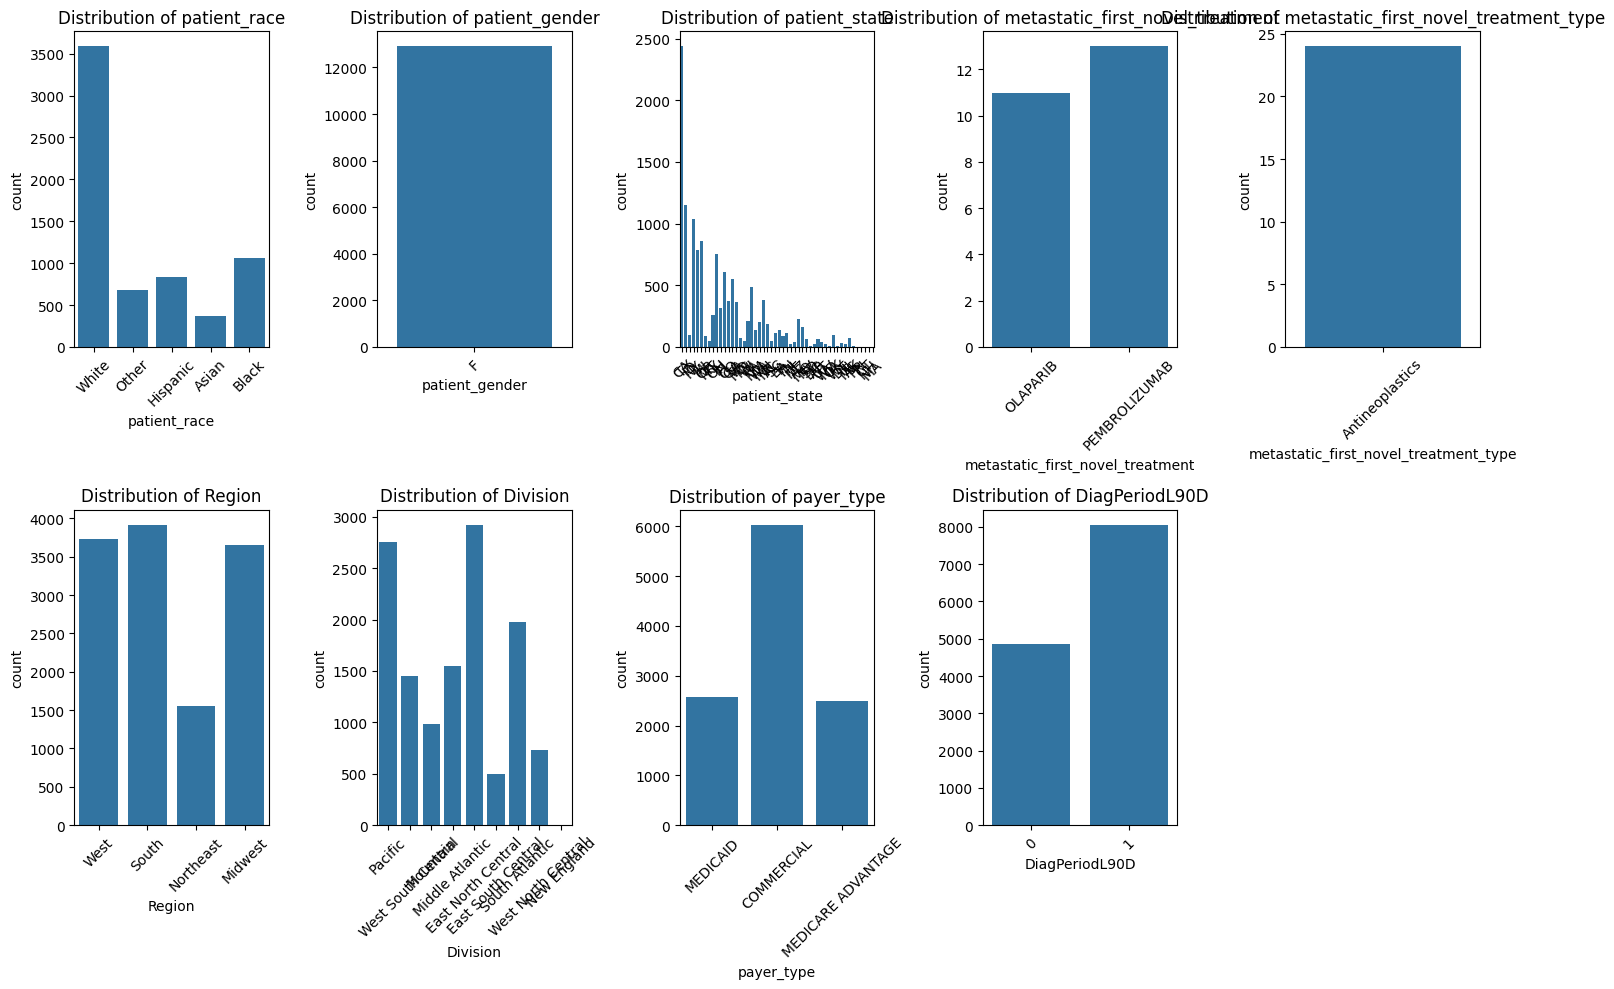

In [ ]:
# Relevant Categorical Features

categorical_features = ['patient_race', 'patient_gender', 'patient_state', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type',
                        'Region', 'Division', 'payer_type', 'DiagPeriodL90D']

rows = (len(categorical_features) // 5) + 1
plt.figure(figsize=(15, rows * 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, 5, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This is the distribution for what I believe are our relevant CATEGORICAL features. For our target variable 'DiagPeriodL90D', there seems to be a class balance. Let's look further into that.

In [ ]:
# Count the occurrences of each unique value in the target column 'DiagPeriodL90D'

target_counts = df['DiagPeriodL90D'].value_counts()
target_counts

,count
DiagPeriodL90D,
1,8060
0,4846


This is definitely a class-imbalance in our training dataset! Though it is not extreme, it may affect our model so let's keep a **note** that we should oversample the 0's or undersample the 1's so that our model can learn later.

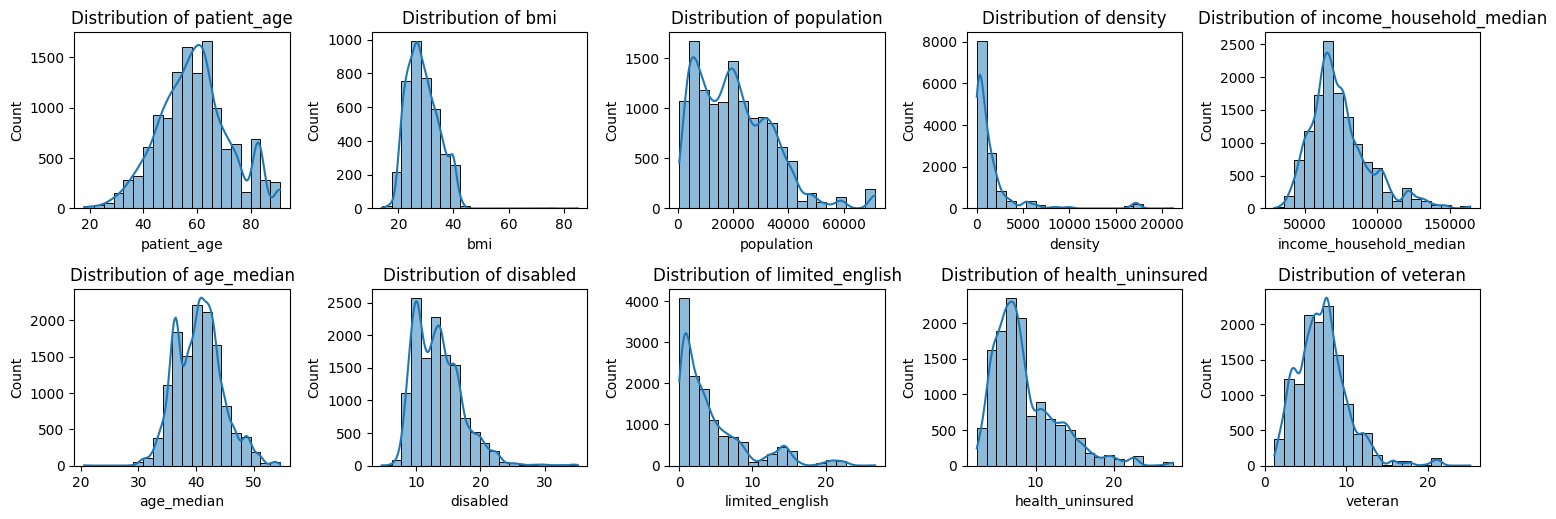

In [ ]:
# Numerical Features

# List of numerical features
numerical_features = ['patient_age', 'bmi', 'population', 'density', 'income_household_median',
                      'age_median', 'disabled', 'limited_english', 'health_uninsured', 'veteran']

# Set up the matplotlib figure size
plt.figure(figsize=(15, 10))

# Plot numerical features - histogram for numerical variables
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)  # 4 rows, 5 columns
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

These are the distributions of our numerical features. Most seem pretty Normally distribution but some are also skewed, like our limited_english feature. These distributions will help us determine how to handle missing values (replacing null values with mean, median, mode, imputation, etc.)

**Correlation Analysis**

In [ ]:
# Trends/patterns/multicollinearity

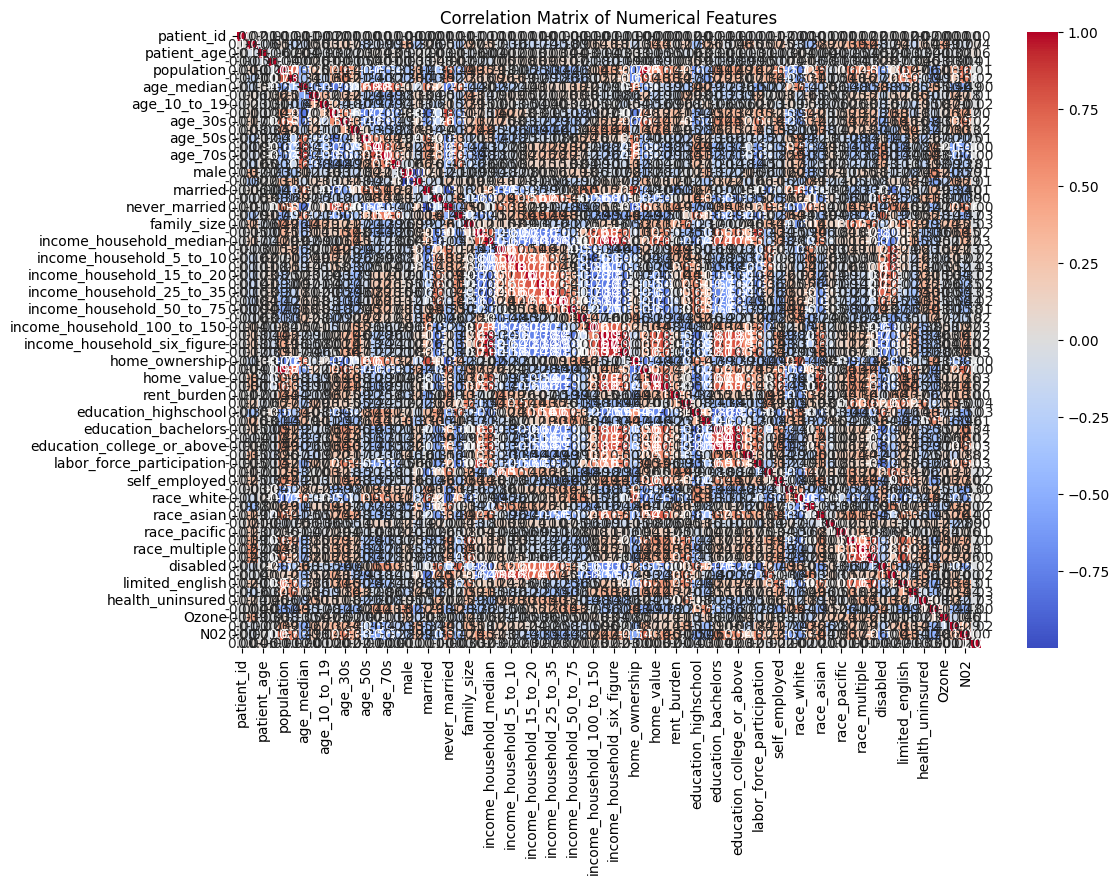

In [ ]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

What is this.

Let's set a threshold so we can check for multicollinearity and low correalation.

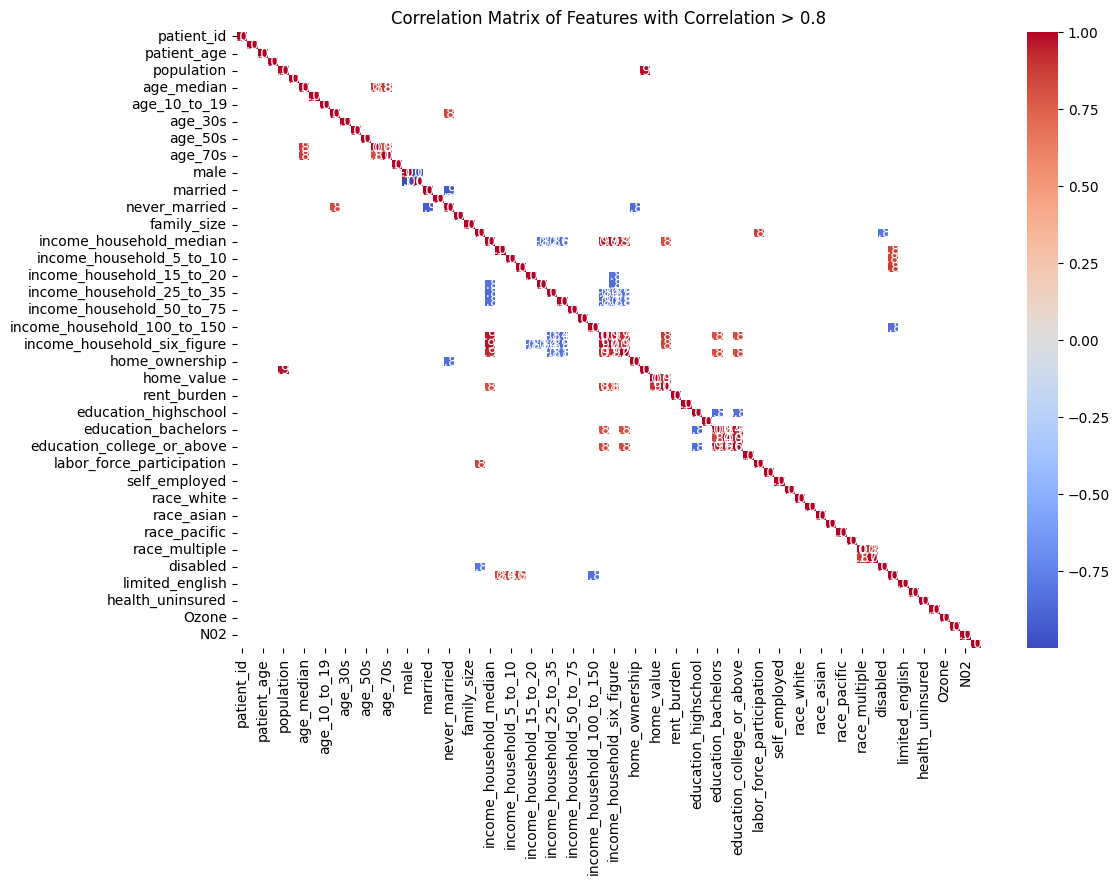

In [ ]:
# Set a correlation threshold for >= 0.8
threshold = 0.8

highly_correlated = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

plt.figure(figsize=(12, 8))
sns.heatmap(highly_correlated, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title(f'Correlation Matrix of Features with Correlation > {threshold}')
plt.show()

In [ ]:
# The graph is too hard to read so let's get the pairs written out for threshold >= 0.8

correlation_matrix = numerical_df.corr()
threshold = 0.8
correlated_pairs = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlated_pairs.add((col1, col2, corr_value))

correlated_df = pd.DataFrame(correlated_pairs, columns=['Feature 1', 'Feature 2', 'Correlation']).sort_values(by='Correlation', key=abs, ascending=False)
print(correlated_df)

                      Feature 1                    Feature 2  Correlation
39                       female                         male    -1.000000
10                housing_units                   population     0.982847
5   income_household_six_figure      income_household_median     0.979407
35  income_household_six_figure    income_household_150_over     0.973406
23    income_household_150_over      income_household_median     0.966081
27   education_college_or_above          education_bachelors     0.961805
30   education_college_or_above           education_graduate     0.958673
37     income_individual_median      income_household_median     0.928126
15                never_married                      married    -0.926330
4      income_individual_median    income_household_150_over     0.915547
38     income_individual_median  income_household_six_figure     0.915105
34                  rent_median                   home_value     0.903422
11                      age_70s       

In [ ]:
# Find low correlated features

# Get correlation of all numerical features with the target
target_corr = numerical_df.corr()['DiagPeriodL90D'].drop('DiagPeriodL90D')

# Filter for features with near-zero correlation with the target
low_corr_with_target = target_corr[abs(target_corr) <= 0.05].sort_values()

print("Features with very low correlation to DiagPeriodL90D:")
print(low_corr_with_target)

Features with very low correlation to DiagPeriodL90D:
education_less_highschool     -0.035954
widowed                       -0.031544
income_household_25_to_35     -0.029044
health_uninsured              -0.028565
commute_time                  -0.027375
education_highschool          -0.026750
family_size                   -0.026735
income_household_10_to_15     -0.026082
income_household_35_to_50     -0.024927
poverty                       -0.024817
race_black                    -0.024484
income_household_15_to_20     -0.022992
income_household_under_5      -0.022534
unemployment_rate             -0.021288
disabled                      -0.020376
income_household_20_to_25     -0.019032
density                       -0.017286
income_household_5_to_10      -0.016907
PM25                          -0.016500
age_10_to_19                  -0.015172
limited_english               -0.011443
age_50s                       -0.010447
female                        -0.009982
age_over_80               

We ended up choosing a multicollinearity threshold of 0.8 because it was what we learned in class but also because there are a lot of feature pairs that have high correlation with each other which can be alarming for our dataset. However, this does make sense because these are socioeconomic features for a certain zip code and certain information can already be captured within another feature. An example being number of houses and density of a zip code area.
- **Note:** Tree-based models are less sensitive to multicollinearity

###**Baseline Model**

The model to be used will be logistic regression since this is a classification problem with 0's and 1's. But before we make our baseline model, our data has a lot of missing data and deleting all the rows of our data set would be contradictive because there is a missing entry in every row. So what we should do is that since this is just a baseline, let's not do any feature engineering but just rather do the bare minimum for a logistic regression model to work, since it won't work with null values. Meaning, just remove columns and imputate if needed. And if there are missing rows after that, we can remove them.
- So remove:
  - metastatic_first_novel_treatment (unrecoverable)
  - metastatic_first_novel_treatment_type (unrecoverable)
  - bmi (too many null values and not predictive for time-to-diagnosis target)
  - patient_id (this is not necessary to our data and is just a classifier)
  - breast_cancer_diagnosis_desc (this is just a description and not needed)
- And impute:
  - patient_race (fill the missing values with "Unknown" rather than mode because that would be misdirection)
  - payer_type (also fill the missing values with "Unknown". We can do mode too but let's try with this Unknown first)

Remember we are not removing everything unnecessary or scaling anything yet. We are just doing the bare minimum for our baseline model to work so that we can use it as a reference point!

**Removing and Imputing Rows with A Lot of Null Values**

In [ ]:
# Making a baseline_df copy so that we can edit the original df later during preprocessing

baseline_df = df.copy()

baseline_df = baseline_df.drop(columns=[
    'metastatic_first_novel_treatment',
    'metastatic_first_novel_treatment_type',
    'bmi', 'patient_id', "breast_cancer_diagnosis_desc"])

# Impute categorical variables with 'Unknown'
baseline_df['patient_race'] = baseline_df['patient_race'].fillna('Unknown')
baseline_df['payer_type'] = baseline_df['payer_type'].fillna('Unknown')

# You may also want to do this for region/state/division if needed:
baseline_df['Region'] = baseline_df['Region'].fillna('Unknown')
baseline_df['Division'] = baseline_df['Division'].fillna('Unknown')
baseline_df['patient_state'] = baseline_df['patient_state'].fillna('Unknown')

In [ ]:
# Remove the rest of the null values since they don't take up a lot of rows
baseline_df = baseline_df.dropna()
baseline_df.shape

# 12873 rows and 80 columns is still a great amount of data

(12873, 78)

**Encoding Categorical Data**

This is a little tricky. For our categorical variables, they have no inherent order or ranking so we would have to use one-hot encoding. But the problem is that our data set already has 80 columns and features and one-hot encoding would create so many more columns which could cause overfitting or algorithm learning problems in our model training. So because of that, we have to either choose label-encoding or a different way. Label-encoding works best when there is a hierarchical order in your data: i.e. undergraduate < masters < phd. But that does not work with our features like race because label-encoding would assume a hierarchy between races, which would be incorrect. So we turn to frequency encoding which replaces each category with the frequency count (how many times it shows up in the dataset). This way works better because it reduces dimensionality, does not create any more columns, has no ordinal assumptions, and preserves distributions. So we will go with that instead.

In [ ]:
# List of categorical features to encode
categorical_features = [
    'patient_race', 'payer_type', 'patient_state',
    'patient_gender', 'breast_cancer_diagnosis_code',
    'metastatic_cancer_diagnosis_code', 'Region', 'Division'
]

# Apply frequency encoding to each categorical column
for feature in categorical_features:
    frequency_encoding = baseline_df[feature].value_counts() / len(baseline_df)
    baseline_df[feature] = baseline_df[feature].map(frequency_encoding)

In [ ]:
baseline_df.head(5)

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,0.494446,0.198788,0.189389,924,84,1.0,0.113726,0.026723,0.288045,0.211839,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,0.278568,0.467490,0.189389,928,62,1.0,0.075895,0.546415,0.288045,0.211839,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,0.278568,0.467490,0.089490,760,43,1.0,0.016236,0.546415,0.304047,0.112406,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,0.278568,0.467490,0.189389,926,45,1.0,0.022761,0.546415,0.288045,0.211839,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.623810,3.098095,54.564286,120533.83330,3.435714,1.273810,2.180952,2.211905,2.100000,4.380952,5.885714,10.897619,10.721429,18.850000,38.057143,56.907143,55336.28571,59.221429,12171.302330,1.012474e+06,2354.738095,32.030952,5.835714,12.145238,26.269048,33.285714,22.459524,55.745238,48.938095,64.430952,5.264286,18.502381,0.0523

**Creating Our Baseline Model**

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.51      0.45       967
           1       0.65      0.54      0.59      1608

    accuracy                           0.53      2575
   macro avg       0.52      0.52      0.52      2575
weighted avg       0.55      0.53      0.53      2575

Accuracy: 0.5266
Precision: 0.6455
Recall: 0.5367
F1 Score: 0.5861


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


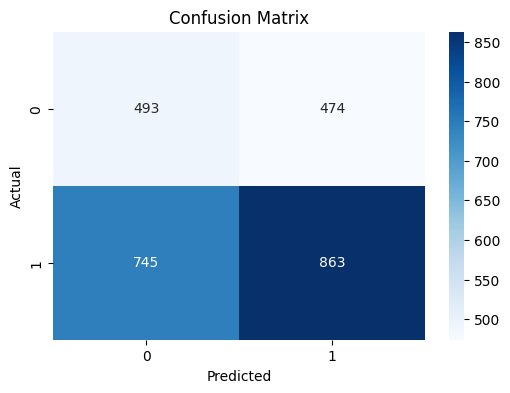

In [ ]:
X = baseline_df.drop(columns=['DiagPeriodL90D'])
y = baseline_df['DiagPeriodL90D']

# Train-test split (stratify to maintain imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# No scaling just yet - but make sure to balance our dataset

model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Our baseline results show that...
- Overall model
  - Accuracy: 0.52
  - Precision: 0.64
  - Recall: 0.53
  - F1: 0.58
- Class 0
  - Precision:0.40
  - Recall: 0.51
  - F1: 0.45
- Class 1 (Performed better)
  - Precision: 0.65
  - Recall: 0.54
  - F1: 0.59

###**Data Preprocessing**

Now that we have our baseline model, we can finally work on our original dataframe and make it the best! We will also use our baseline model template after each step to check if it worked to improve our model or not. **Refer to the check-list we made earlier after our descriptive statistics during EDA and our baseline model checklist**

In [ ]:
df.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.62

**Removing the For-Sure Unnecessary Columns (Feature Selection)**

In [ ]:
df=df.drop(columns=["patient_id", "patient_zip3", "patient_gender", "bmi", "breast_cancer_diagnosis_desc", "metastatic_first_novel_treatment",
                    "metastatic_first_novel_treatment_type"])

In [ ]:
# Use this as a checkpoint during preprocessing in the case you want to try something new or do something else. So if you want to restart preprocessing, use this df.
df_checkpoint = df.copy()
df_checkpoint.to_csv('df_checkpoint.csv', index=False)

In [ ]:
df = pd.read_csv('df_checkpoint.csv')

In [ ]:
df.head(5)

,patient_race,payer_type,patient_state,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,NaN,MEDICAID,CA,84,C50919,C7989,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,White,COMMERCIAL,CA,62,C50411,C773,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,White,COMMERCIAL,TX,43,C50112,C773,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,White,COMMERCIAL,CA,45,C50212,C773,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.623810,3.098095,54.564286,120533.83330,3.435714,1.273810,2.180952,2.211905,2.100000,4.380952,5.885714,10.897619,10.721429,18.850000,38.057143,56.907143,55336.28571,59.221429,12171.302330,1.012474e+06,2354.738095,32.030952,5.835714,12.145238,26.269048,33.285714,22.459524,55.745238,48.938095,64.430952,5.264286,18.502381,0.052381,65.014286,1.438095,18.845238,0.430952,0.252381,5.428571,8.611905,16.716667,8.845238,8.688095,5.280952,27.561905,4.404762

**Multicollinearity Handling (Low and High Correlated Features)**

This needs to be strict since we have so many columns to reduce dimensionality. Let's split this up with low correlation and multicollinearity.

In [ ]:
# Multicollinearity - please refer back to the multicollinearity list created during EDA

# Removing columns from multicollinearity threshold >= 0.9
df = df.drop(columns=["male", "housing_units", "income_household_six_figure", "income_household_150_over", "education_bachelors", "education_graduate",
                      "income_individual_median", "never_married", "rent_median"])

# Removing columns from multicollinearity threshold >= 0.8
df = df.drop(columns=["race_multiple", "family_dual_income", "education_highschool", "income_household_25_to_35", "income_household_35_to_50",
                      "income_household_20_to_25", "age_70s"])

Also remember that low correlation doesn't mean the data isn't useful. It could tell a bigger story. But since we have 80 features, we still do need to prune aggressively. Therefore a threshold of low correlation less than 0.5 was set. Then we used domain knowledge to choose which out of the pair to keep, while keeping the objective in mind - does this variable relate to a diagnosis within 90 days or not.

In [ ]:
# Low - please refer back to the low correlation list created during EDA in relation to our target variable

df = df.drop(columns=["home_value", "self_employed", "education_stem_degree", "education_some_college", "Ozone", "rent_burden", "divorced", "N02", "farmer",
                      "home_ownership", "veteran", "female", "PM25", "commute_time"])

In [ ]:
df.shape

# Now we have 46 columns which is much better

(12906, 46)

**Encoding**

Here we actually find out that label encoding does better for our model than frequency encoding!

In [ ]:
# Impute patient_race, payer_type, patient_state, Region, and Division with "Unknown" if there is a missing value

df['patient_race'] = df['patient_race'].fillna('Unknown')
df['payer_type'] = df['payer_type'].fillna('Unknown')
df['Region'] = df['Region'].fillna('Unknown')
df['Division'] = df['Division'].fillna('Unknown')
df['patient_state'] = df['patient_state'].fillna('Unknown')

# Remove any rows with missing values

df = df.dropna()

In [ ]:
# Label encode the categorical columns patient_race, payer_type, patient_state, breast_cancer_diagnosis_code, metastatic_cancer_diagnosis_code, Region, and Division

# Initialize the label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['patient_race', 'payer_type', 'patient_state', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'Region', 'Division']

# Loop through each column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Re-evaluate using our logistic regression model
X = df.drop(columns=['DiagPeriodL90D'])
y = df['DiagPeriodL90D']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# No scaling just yet - but make sure to balance our dataset

model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.66       969
           1       0.80      0.75      0.77      1612

    accuracy                           0.73      2581
   macro avg       0.71      0.72      0.71      2581
weighted avg       0.73      0.73      0.73      2581

Accuracy: 0.7261
Precision: 0.8023
Recall: 0.7450
F1 Score: 0.7726


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Outlier Handling**

From our data distributions, there were no outliers. There were only a few (1-4) missing values per category so those were just removed.

**Feature Engineering**

In [ ]:
# List the column names of the dataset to see what we can work with

df.columns

Index(['patient_race', 'payer_type', 'patient_state', 'patient_age',
       'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code',
       'Region', 'Division', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'age_60s', 'age_over_80', 'married', 'widowed',
       'family_size', 'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'education_less_highschool', 'education_college_or_above',
       'labor_force_participation', 'unemployment_rate', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'poverty', 'limited_english',
       'health_uninsured', 'DiagPeriodL90D'],
      dtype='object')

In [ ]:
# Feature 1: Poverty percentage because we know that income affects medical expenses

df['poverty_percentage'] = (df['poverty'] / df['population']) * 100
df.drop('poverty', axis=1, inplace=True)

In [ ]:
# Feature 2: Older population ratio because some doctors might overlook diagnosis due to old age

df['older_age_percentage'] = (
    df[['age_60s', 'age_over_80']].sum(axis=1) / df['population']
) * 100

df.drop(['age_60s', 'age_over_80'], axis=1, inplace=True)

In [ ]:
# Feature 3: Low income household ratio - combining these into groups to reduce the number of features

low_income_cols = ['income_household_under_5', 'income_household_5_to_10',
                   'income_household_10_to_15', 'income_household_15_to_20']

df['low_income_percentage'] = (
    df[low_income_cols].sum(axis=1) / df['population']
) * 100

df.drop(['income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20'], axis=1, inplace=True)

In [ ]:
# Re-evaluate using our logistic regression model
X = df.drop(columns=['DiagPeriodL90D'])
y = df['DiagPeriodL90D']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# No scaling just yet - but make sure to balance our dataset

model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.66       969
           1       0.80      0.75      0.77      1612

    accuracy                           0.73      2581
   macro avg       0.71      0.72      0.71      2581
weighted avg       0.73      0.73      0.73      2581

Accuracy: 0.7269
Precision: 0.8021
Recall: 0.7469
F1 Score: 0.7735


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df.columns

Index(['patient_race', 'payer_type', 'patient_state', 'patient_age',
       'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code',
       'Region', 'Division', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'married', 'widowed', 'family_size',
       'income_household_median', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'education_less_highschool', 'education_college_or_above',
       'labor_force_participation', 'unemployment_rate', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'limited_english', 'health_uninsured',
       'DiagPeriodL90D', 'poverty_percentage', 'older_age_percentage',
       'low_income_percentage'],
      dtype='object')

In [ ]:
df.shape

(12902, 42)

In [ ]:
df.isnull().sum()

,0
patient_race,0
payer_type,0
patient_state,0
patient_age,0
breast_cancer_diagnosis_code,0
metastatic_cancer_diagnosis_code,0
Region,0
Division,0
population,0
density,0


In [ ]:
df = df.dropna()

In [ ]:
# Move target variable back to the end

diag_col = df.pop('DiagPeriodL90D')
df['DiagPeriodL90D'] = diag_col

Let's do PCA on our features since we have so many.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Extract unscaled features and labels
X_unscaled = df.drop(columns=['DiagPeriodL90D'])  # no scaling applied
y = df['DiagPeriodL90D']

# Step 2: Apply PCA to unscaled data
pca = PCA(n_components=0.95)  # Adjust if you want a fixed number of components
X_pca_unscaled = pca.fit_transform(X_unscaled)

print(f"PCA reduced features from {X_unscaled.shape[1]} to {X_pca_unscaled.shape[1]}")

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca_unscaled, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Logistic Regression
model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predictions and Metrics
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


PCA reduced features from 41 to 2
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.56      0.46       969
           1       0.64      0.48      0.55      1612

    accuracy                           0.51      2581
   macro avg       0.52      0.52      0.51      2581
weighted avg       0.55      0.51      0.52      2581

Accuracy: 0.5107
Precision: 0.6446
Recall: 0.4826
F1 Score: 0.5520


It seems that our new features helped our model learn. But after doing PCA on it, it did not work as well. Let's see if standardizing works.

**Scaling/Normalization**

In [ ]:
df.columns

Index(['patient_race', 'payer_type', 'patient_state', 'patient_age',
       'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code',
       'Region', 'Division', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'married', 'widowed', 'family_size',
       'income_household_median', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'education_less_highschool', 'education_college_or_above',
       'labor_force_participation', 'unemployment_rate', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'limited_english', 'health_uninsured',
       'poverty_percentage', 'older_age_percentage', 'low_income_percentage',
       'DiagPeriodL90D'],
      dtype='object')

In [ ]:
# List of numerical columns to scale
numerical_columns = ['patient_age', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'married', 'widowed', 'family_size',
       'income_household_median', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'education_less_highschool', 'education_college_or_above',
       'labor_force_participation', 'unemployment_rate', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'limited_english', 'health_uninsured', 'poverty_percentage', 'older_age_percentage']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define features and labels
X = df.drop(columns=['DiagPeriodL90D'])  # drop target column
y = df['DiagPeriodL90D']                 # target column

# Step 2: Apply PCA to scaled features
pca = PCA(n_components=0.95)  # retain 95% of variance
X_pca = pca.fit_transform(X)

print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

# Step 3: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Train logistic regression
model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

PCA reduced features from 41 to 4
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       969
           1       0.80      0.76      0.78      1612

    accuracy                           0.73      2581
   macro avg       0.72      0.72      0.72      2581
weighted avg       0.74      0.73      0.73      2581

Accuracy: 0.7315
Precision: 0.7986
Recall: 0.7624
F1 Score: 0.7801


In [ ]:
# This is the dataframe we will use for our models

df_scaled_pca_preprocessed = df.copy()
df_scaled_pca_preprocessed.to_csv('df_preprocessed_scaled_pca.csv', index=False)

###**Iterative Modeling: Diego Maldonado**

Now that we have our baseline model, we're going to select several more models along with logistic regression to see if we can get a better score than baseline. The best performing one will then have its hyperparameters optimized. The models I'll be choosing
- K Nearest Neighbors (KNN): Simple, nonparametric model. Can handle class imbalances with over/under sampling strategies
- Decision Tree: Can capture nonlinear relationships and easy to interpret
- Random Forest and XGBoost: Combine decision trees to increase metrics and can handle noise and outliers
- Support Vector Machine (SVM): Good for finding the optimal way to seperate classes for binary classification. Performs well on large amounts of features.

In [ ]:
# Import the preprocessed df

df_pca = pd.read_csv('df_preprocessed_scaled_pca.csv')
df_pca.head(5)

,patient_race,payer_type,patient_state,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,...,race_pacific,race_other,hispanic,disabled,limited_english,health_uninsured,poverty_percentage,older_age_percentage,low_income_percentage,DiagPeriodL90D
0,4,1,4,1.860807,48,41,4,5,0.769819,-0.132136,...,0.402207,3.427583,2.831495,-0.126301,1.162945,0.624209,-0.290164,-0.613445,0.058665,1
1,5,0,4,0.211052,29,3,4,5,1.323201,0.240832,...,0.317505,0.953592,1.144267,-1.187302,0.740685,-0.370669,-0.536364,-0.594690,0.022215,1
2,5,0,43,-1.213736,18,3,2,9,0.089909,-0.322038,...,0.014459,-0.298497,0.053482,-0.564948,-0.231200,1.544111,-0.439256,-0.468231,0.042931,1
3,5,0,4,-1.063758,22,3,4,5,0.867587,0.106084,...,0.223391,-0.040699,-0.102301,-1.217755,0.166635,-0.992416,-0.532865,-0.522824,0.027755,0
4,4,0,13,-0.313870,7,3,4,3,-0.710222,-0.493744,...,-0.061961,-0.096447,-0.300905,0.525551,-0.522847,0.835469,-0.121637,-0.026206,0.100696,0


As noted earlier in the file, we are dealing with a class imbalance, so the models will have to take that into account. Logistic regression, decision trees, random forest, and SVM all support the class_weight hyperparameter that will automatically compensate for the class imbalance. XGBoost will use scale_pos_weight (the ratio of the minority class to the majority class) to put more importance on correctly predicting the minority class. KNN doesn't have a specific hyperparameter to accomplish this so it will just be given a default k value.  

**Models: Class Weights Only**

Logistic Regression
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       969
           1       0.80      0.74      0.77      1612

    accuracy                           0.72      2581
   macro avg       0.71      0.72      0.71      2581
weighted avg       0.73      0.72      0.72      2581

Logistic Regression Accuracy: 0.7207
Logistic Regression Precision: 0.8004
Logistic Regression Recall: 0.7364
Logistic Regression F1 Score: 0.7670

KNN
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       969
           1       0.79      0.86      0.82      1612

    accuracy                           0.77      2581
   macro avg       0.76      0.74      0.74      2581
weighted avg       0.76      0.77      0.76      2581

KNN Accuracy: 0.7683
KNN Precision: 0.7881
KNN Recall: 0.8604
KNN F1 Score: 0.8227

Decision Tree
              precision    recall  f1-score   support

           0       0.

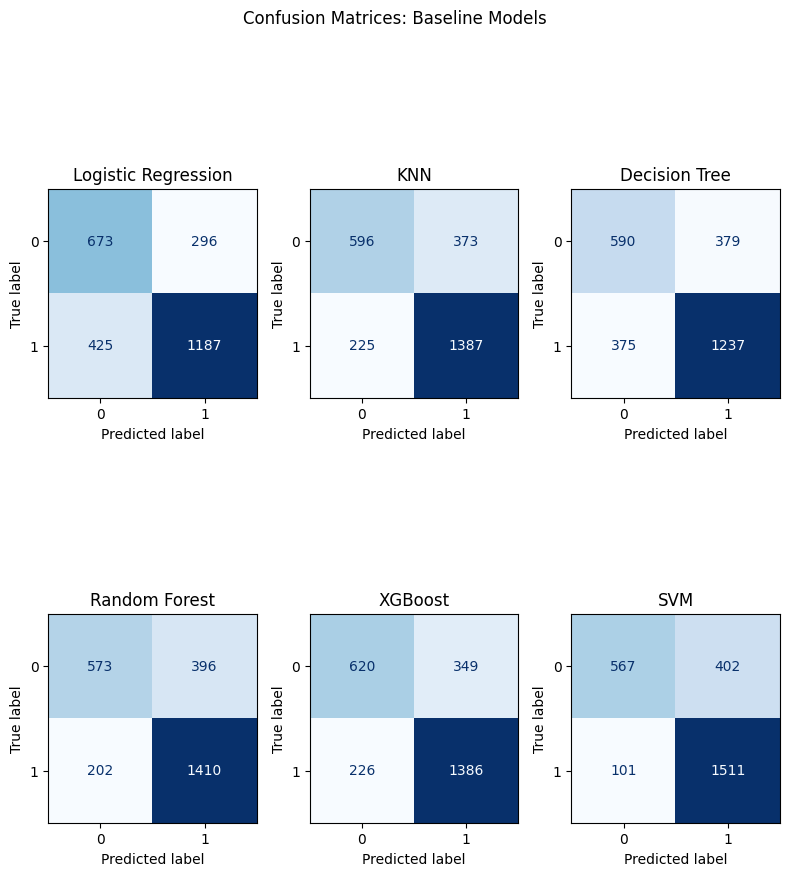

In [ ]:
# Training and evaluating baseline models, ensuring class imbalance is accounted for

# Function to evaluate the models
def evaluate_model(model, y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"{model}")
  print(classification_report(y_test, y_pred))

  print(f"{model} Accuracy: {accuracy:.4f}")
  print(f"{model} Precision: {precision:.4f}")
  print(f"{model} Recall: {recall:.4f}")
  print(f"{model} F1 Score: {f1:.4f}\n")

# Function to create a subplot for the confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrices(models, y_test, figsize=(8, 10), title='Confusion Matrices'):
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    axes = axes.flatten()

    for i, (model_name, y_pred) in enumerate(models.items()):
        ax = axes[i]
        disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues', colorbar=False)
        ax.set_title(model_name)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Split the dataset
X = df_pca.drop(columns=['DiagPeriodL90D'])
y = df_pca['DiagPeriodL90D']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression Model
log_model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# K Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Model
from xgboost import XGBClassifier

ratio = np.sum(y_train == 0) / np.sum(y_train == 1)
xgb_model = XGBClassifier(scale_pos_weight = ratio, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# SVM Model
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

models = {'Logistic Regression': y_pred_log, 'KNN': y_pred_knn, 'Decision Tree': y_pred_dt,
          'Random Forest': y_pred_rf, 'XGBoost':y_pred_xgb, 'SVM':y_pred_svm}

for model_name, model_pred in models.items():
  evaluate_model(model_name, y_test, model_pred)

plot_confusion_matrices(models, y_test, title="Confusion Matrices: Baseline Models")

Since this is a medical diagnosis dataset, our biggest metric priority will be recall. A false negative for a cancer diagnosis can be deadly for a patient, so we want to minimuze them as much as possible. SVM had the highest overall recall, so it's a good candidate for a final model. XGBoost is another good option as well given its high class 0 recall and relatively high overall metrics. However, the class 0 recall is significantly lower than class 1 for almost all of the models, which is a significant problem. Let's try some other methods to increase the class 0 recall before we move on to hyperparameter tuning.

**Applying SMOTE**

SMOTE (Synthetic Minority Over-Sampling Technique) addresses class imbalance by generating synthetic examples of the minority class. This helps the models better learn the decision boundary for the underrepresented class. Because SMOTE balances the class distribution in the dataset, using class weights alongside it may become redundant and could increase the risk of overfitting. Therefore, the class_weight and scale_pos_weight hyperparameters will be removed when SMOTE is applied.

Logistic Regression
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       969
           1       0.80      0.74      0.77      1612

    accuracy                           0.72      2581
   macro avg       0.71      0.71      0.71      2581
weighted avg       0.73      0.72      0.72      2581

Logistic Regression Accuracy: 0.7203
Logistic Regression Precision: 0.7987
Logistic Regression Recall: 0.7382
Logistic Regression F1 Score: 0.7672

KNN
              precision    recall  f1-score   support

           0       0.60      0.69      0.65       969
           1       0.80      0.73      0.76      1612

    accuracy                           0.71      2581
   macro avg       0.70      0.71      0.70      2581
weighted avg       0.72      0.71      0.72      2581

KNN Accuracy: 0.7141
KNN Precision: 0.7977
KNN Recall: 0.7264
KNN F1 Score: 0.7604

Decision Tree
              precision    recall  f1-score   support

           0       0.

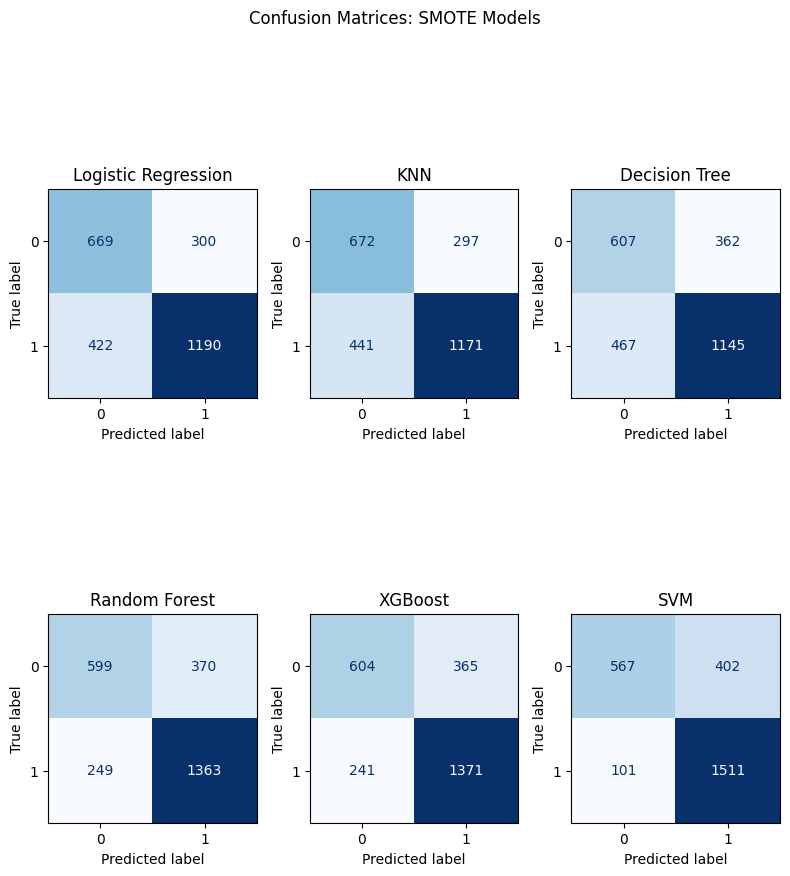

In [ ]:
# Split the dataset
X = df_pca.drop(columns=['DiagPeriodL90D'])
y = df_pca['DiagPeriodL90D']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training splits
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression Model
log_model = LogisticRegression(max_iter=3000, random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_model.predict(X_test)

# K Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test)

models = {'Logistic Regression': y_pred_log, 'KNN': y_pred_knn, 'Decision Tree': y_pred_dt,
          'Random Forest': y_pred_rf, 'XGBoost':y_pred_xgb, 'SVM':y_pred_svm}

for model_name, model_pred in models.items():
  evaluate_model(model_name, y_test, model_pred)

plot_confusion_matrices(models, y_test, title="Confusion Matrices: SMOTE Models")

SMOTE managed to slightly boost the recall for class 0 for several of the models such as logistic regression, KNN, decision trees, and random forest. However, these scores are still pretty low compared to the model's respective class 1 recall, so we'll try another method.

**Random Under Sampling + Class Weights**

Instead of increasing the amount of samples of the minority class, we'll remove random samples of the majority class to balance the dataset. Class weight hyperparameters will also be reintroduced since there is less risk of overfitting with random under sampling.

Logistic Regression
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       969
           1       0.80      0.74      0.77      1612

    accuracy                           0.72      2581
   macro avg       0.71      0.71      0.71      2581
weighted avg       0.73      0.72      0.72      2581

Logistic Regression Accuracy: 0.7199
Logistic Regression Precision: 0.7985
Logistic Regression Recall: 0.7376
Logistic Regression F1 Score: 0.7668

KNN
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       969
           1       0.79      0.75      0.77      1612

    accuracy                           0.72      2581
   macro avg       0.70      0.71      0.70      2581
weighted avg       0.72      0.72      0.72      2581

KNN Accuracy: 0.7172
KNN Precision: 0.7890
KNN Recall: 0.7469
KNN F1 Score: 0.7674

Decision Tree
              precision    recall  f1-score   support

           0       0.

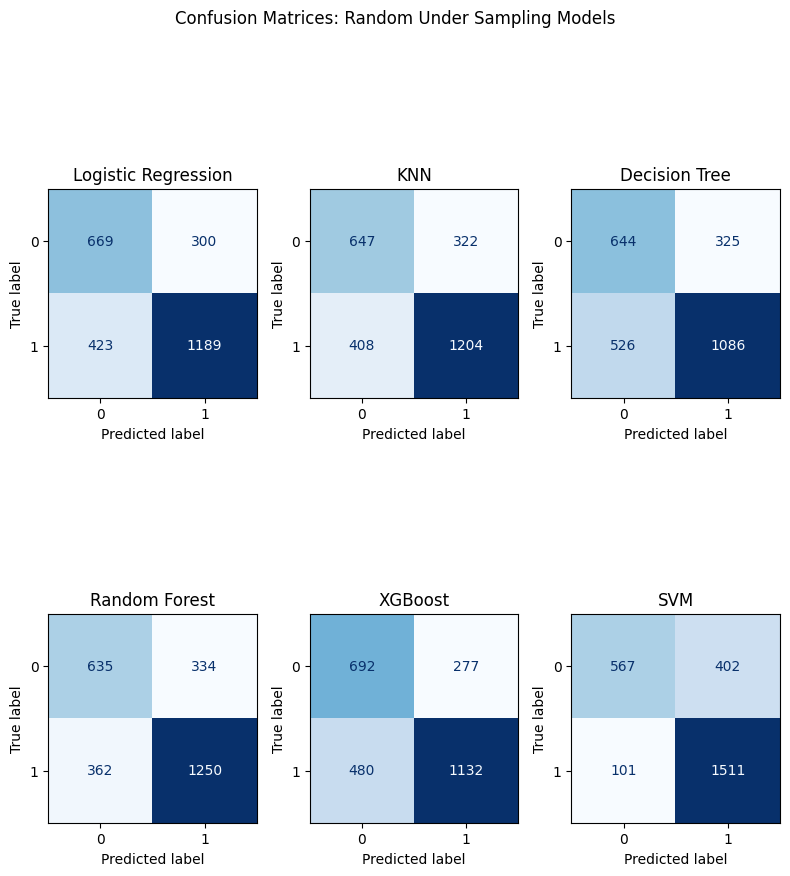

In [ ]:
# Split the dataset
X = df_pca.drop(columns=['DiagPeriodL90D'])
y = df_pca['DiagPeriodL90D']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize RandomUnderSampler and apply to the training data
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Logistic Regression Model
log_model = LogisticRegression(class_weight="balanced", max_iter=3000, random_state=42)
log_model.fit(X_train_rus, y_train_rus)
y_pred_log = log_model.predict(X_test)

# K Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_rus, y_train_rus)
y_pred_knn = knn_model.predict(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt_model.fit(X_train_rus, y_train_rus)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train_rus, y_train_rus)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Model
ratio = np.sum(y_train == 0) / np.sum(y_train == 1)
xgb_model = XGBClassifier(scale_pos_weight = ratio,random_state=42)
xgb_model.fit(X_train_rus, y_train_rus)
y_pred_xgb = xgb_model.predict(X_test)

# SVM Model
svm_model = SVC(class_weight="balanced", kernel='rbf', random_state=42)
svm_model.fit(X_train_rus, y_train_rus)
y_pred_svm = svm_model.predict(X_test)

models = {'Logistic Regression': y_pred_log, 'KNN': y_pred_knn, 'Decision Tree': y_pred_dt,
          'Random Forest': y_pred_rf, 'XGBoost':y_pred_xgb, 'SVM':y_pred_svm}

for model_name, model_pred in models.items():
  evaluate_model(model_name, y_test, model_pred)

plot_confusion_matrices(models, y_test, title="Confusion Matrices: Random Under Sampling Models")

Random under sampling again slightly boosted some of the recall scores for class 0 such as in XGBoost, decision trees, and random forest. Still not our ideal scores, so we'll try one more method to get these scores to increase.

**ADASYN + No Class Weight**

ADASYN (Adaptive Synthetic Sampling) is a minority oversampling technique like SMOTE, but it focuses on creating synthetic samples in regions where the minority class is more difficult to learn. I'll also be removing the class weight hyperparameter to avoid overfitting like I did in SMOTE.

Logistic Regression
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       969
           1       0.79      0.72      0.75      1612

    accuracy                           0.71      2581
   macro avg       0.69      0.70      0.69      2581
weighted avg       0.72      0.71      0.71      2581

Logistic Regression Accuracy: 0.7052
Logistic Regression Precision: 0.7916
Logistic Regression Recall: 0.7165
Logistic Regression F1 Score: 0.7522

KNN
              precision    recall  f1-score   support

           0       0.54      0.74      0.62       969
           1       0.80      0.62      0.70      1612

    accuracy                           0.66      2581
   macro avg       0.67      0.68      0.66      2581
weighted avg       0.70      0.66      0.67      2581

KNN Accuracy: 0.6618
KNN Precision: 0.7954
KNN Recall: 0.6172
KNN F1 Score: 0.6951

Decision Tree
              precision    recall  f1-score   support

           0       0.

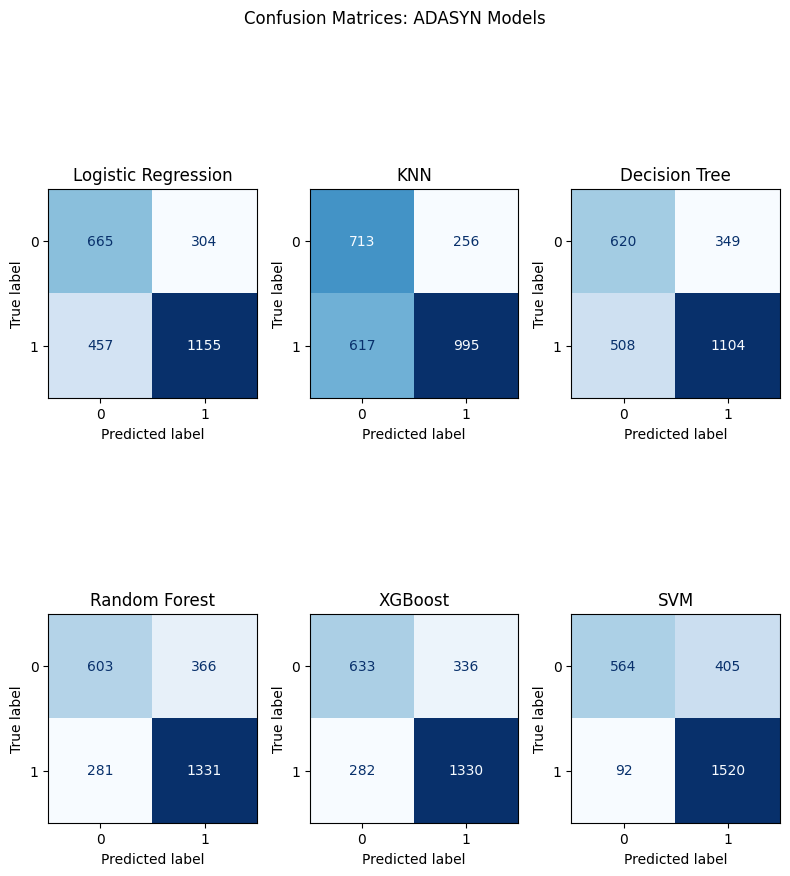

In [ ]:
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Apply ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Logistic Regression Model
log_model = LogisticRegression(max_iter=3000, random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_model.predict(X_test)

# K Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test)

models = {'Logistic Regression': y_pred_log, 'KNN': y_pred_knn, 'Decision Tree': y_pred_dt,
          'Random Forest': y_pred_rf, 'XGBoost':y_pred_xgb, 'SVM':y_pred_svm}

# Evaluate models
for model_name, model_pred in models.items():
  evaluate_model(model_name, y_test, model_pred)

plot_confusion_matrices(models, y_test, title="Confusion Matrices: ADASYN Models")

This method had little effect on the models. I'm goint to proceed with XGBoost and SVM as my finals models to hypertune. I will be using the Random Under Sampling + Class Weights for this since this is where they performed the best.

**Hyperparameter Tuning: Grid Search**

I will be using grid search to find the best combination of hyperparameters. It will find the best combination by brute forcing every single combination possible and evaluating it. Takes **very** long time, but is very effective.

In [ ]:
# Apply Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Set up Grid Search for XGBoost
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [3, 5, 7], # Depth of the trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage to prevent overfitting
    'scale_pos_weight': [1, ratio]  # See which value works better for imbalance
}

xgb = XGBClassifier(random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='recall', cv=5, n_jobs=-1)
grid_xgb.fit(X_train_rus, y_train_rus)

# Set up Grid Search for SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1], # Controls the trade-off between maximizing margin and minimizing classification error
    'kernel': ['linear', 'rbf'],  # Function that defines the decision boundary
    'gamma': ['scale', 'auto'],  # Influence of training samples (RBF only)
    'class_weight': ['balanced', None],  # Handle class imbalance
}

svc = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svc, param_grid_svm, scoring='recall', cv=5, n_jobs=-1)
grid_svm.fit(X_train_rus, y_train_rus)

# Print best paramaters and recall scores
print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best SVM Params:", grid_svm.best_params_)
print("Best XGBoost Score:", grid_xgb.best_score_)
print("Best SVM Score:", grid_svm.best_score_)

Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}
Best SVM Params: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Best XGBoost Score: 0.962051846294907
Best SVM Score: 0.9517239309827457


XGBoost
              precision    recall  f1-score   support

           0       0.88      0.58      0.70       969
           1       0.79      0.95      0.86      1612

    accuracy                           0.81      2581
   macro avg       0.84      0.77      0.78      2581
weighted avg       0.82      0.81      0.80      2581

XGBoost Accuracy: 0.8129
XGBoost Precision: 0.7899
XGBoost Recall: 0.9541
XGBoost F1 Score: 0.8643



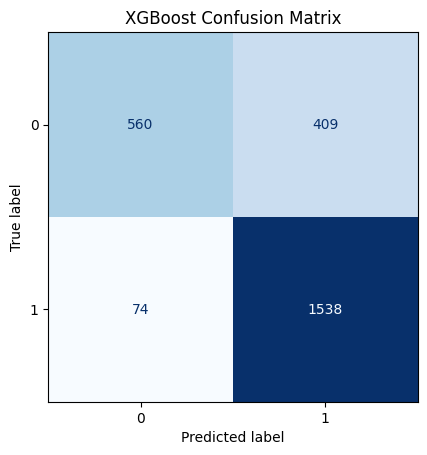

SVM
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       969
           1       0.78      0.95      0.86      1612

    accuracy                           0.81      2581
   macro avg       0.83      0.76      0.77      2581
weighted avg       0.82      0.81      0.79      2581

SVM Accuracy: 0.8051
SVM Precision: 0.7845
SVM Recall: 0.9485
SVM F1 Score: 0.8587



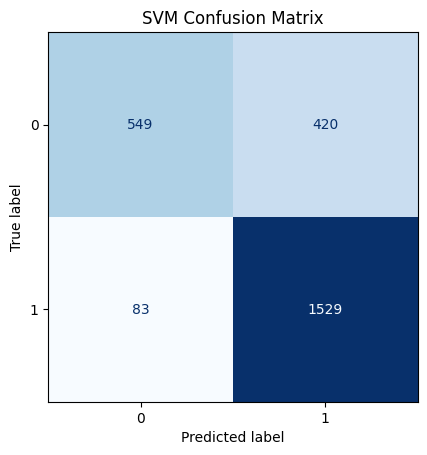

In [ ]:
# Final metrics of the best models
best_xgb = grid_xgb.best_estimator_
best_svm = grid_svm.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
y_pred_svm = best_svm.predict(X_test)

models = {'XGBoost': y_pred_xgb, 'SVM': y_pred_svm}

for model_name, model_pred in models.items():
  evaluate_model(model_name, y_test, model_pred)
  disp = ConfusionMatrixDisplay.from_predictions(y_test, model_pred, display_labels=["0", "1"],
                                                 cmap='Blues', colorbar=False)
  disp.ax_.set_title(f"{model_name} Confusion Matrix")
  plt.show()

###**Iterative Modeling: Akari Kojima**

**NEW DF**

In [ ]:
df_new = pd.read_csv("df_preprocessed_scaled_pca.csv")

In [ ]:
df_new.head()

,patient_race,payer_type,patient_state,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,...,race_pacific,race_other,hispanic,disabled,limited_english,health_uninsured,poverty_percentage,older_age_percentage,low_income_percentage,DiagPeriodL90D
0,4,1,4,1.860807,48,41,4,5,0.769819,-0.132136,...,0.402207,3.427583,2.831495,-0.126301,1.162945,0.624209,-0.290164,-0.613445,0.058665,1
1,5,0,4,0.211052,29,3,4,5,1.323201,0.240832,...,0.317505,0.953592,1.144267,-1.187302,0.740685,-0.370669,-0.536364,-0.594690,0.022215,1
2,5,0,43,-1.213736,18,3,2,9,0.089909,-0.322038,...,0.014459,-0.298497,0.053482,-0.564948,-0.231200,1.544111,-0.439256,-0.468231,0.042931,1
3,5,0,4,-1.063758,22,3,4,5,0.867587,0.106084,...,0.223391,-0.040699,-0.102301,-1.217755,0.166635,-0.992416,-0.532865,-0.522824,0.027755,0
4,4,0,13,-0.313870,7,3,4,3,-0.710222,-0.493744,...,-0.061961,-0.096447,-0.300905,0.525551,-0.522847,0.835469,-0.121637,-0.026206,0.100696,0


In [ ]:
# Separate features and target
X = df_new.drop(columns=['DiagPeriodL90D'])
y = df_new['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- 1. Logistic Regression ---
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_probs = logreg.predict_proba(X_test)[:, 1]

# --- 2. Random Forest ---
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

# --- 3. XGBoost ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_probs = xgb.predict_proba(X_test)[:, 1]

# --- Evaluation ---
def evaluate(name, y_true, y_pred, y_prob):
    print(f"\n🔍 {name}")
    print(classification_report(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_prob))

evaluate("Logistic Regression", y_test, logreg_preds, logreg_probs)
evaluate("Random Forest", y_test, rf_preds, rf_probs)
evaluate("XGBoost", y_test, xgb_preds, xgb_probs)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Logistic Regression
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       969
           1       0.80      0.74      0.77      1612

    accuracy                           0.72      2581
   macro avg       0.71      0.72      0.71      2581
weighted avg       0.73      0.72      0.72      2581

ROC AUC: 0.7802683434611926

🔍 Random Forest
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       969
           1       0.78      0.87      0.83      1612

    accuracy                           0.77      2581
   macro avg       0.76      0.73      0.74      2581
weighted avg       0.77      0.77      0.76      2581

ROC AUC: 0.776075716952577

🔍 XGBoost
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       969
           1       0.80      0.86      0.83      1612

    accuracy                           0.78      2581
   macro avg       0.7

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.60      0.68       969
           1       0.79      0.89      0.84      1612

    accuracy                           0.78      2581
   macro avg       0.78      0.75      0.76      2581
weighted avg       0.78      0.78      0.78      2581

Confusion Matrix:
 [[ 584  385]
 [ 172 1440]]
ROC AUC Score: 0.7843162862637546


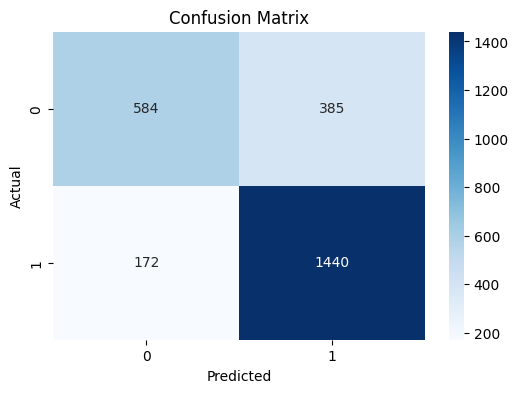

In [ ]:
# Separate features and target
X = df_new.drop(columns=['DiagPeriodL90D'])
y = df_new['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# 2. Train model (XGBoost)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 3. Make predictions and evaluate
y_pred = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Fixing Imbalance**

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = df_new.drop(columns=['DiagPeriodL90D'])
y = df_new['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 1. Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 2. Train model (XGBoost) with SMOTE-balanced data
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_smote, y_train_smote)

# 3. Make predictions and evaluate
y_pred = model.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

import numpy as np
print("Class distribution after SMOTE:", np.bincount(y_train_smote))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67       969
           1       0.79      0.85      0.82      1612

    accuracy                           0.77      2581
   macro avg       0.75      0.74      0.74      2581
weighted avg       0.76      0.77      0.76      2581

Confusion Matrix:
 [[ 604  365]
 [ 241 1371]]
ROC AUC Score: 0.7785577467241305
Class distribution after SMOTE: [6447 6447]


**Scale_pos_weight**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = df_new.drop(columns=['DiagPeriodL90D'])
y = df_new['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Compute ratio of negative to positive samples
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train model using scale_pos_weight
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

import numpy as np
print("Class distribution after Built-in:", np.bincount(y_train))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       969
           1       0.80      0.86      0.83      1612

    accuracy                           0.78      2581
   macro avg       0.77      0.75      0.76      2581
weighted avg       0.77      0.78      0.77      2581

Confusion Matrix:
 [[ 620  349]
 [ 226 1386]]
ROC AUC Score: 0.7908152094584733
Class distribution after Built-in: [3874 6447]


**Oversample**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = df_new.drop(columns=['DiagPeriodL90D'])
y = df_new['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Apply random oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Initialize model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on oversampled data
model.fit(X_train_ros, y_train_ros)

# Predict on original test set
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
import numpy as np
print("Class distribution after Oversample:", np.bincount(y_train_ros))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       969
           1       0.80      0.86      0.83      1612

    accuracy                           0.77      2581
   macro avg       0.76      0.75      0.75      2581
weighted avg       0.77      0.77      0.77      2581

Confusion Matrix:
 [[ 617  352]
 [ 229 1383]]
ROC AUC Score: 0.7843723031853462
Class distribution after Oversample: [6447 6447]


In [ ]:
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = df_new.drop(columns=['DiagPeriodL90D'])
y = df_new['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Apply random oversampling to training data
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

# Initialize model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on oversampled data
model.fit(X_res, y_res)

# Predict on original test set
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
import numpy as np
print("Class distribution after ADASYN:", np.bincount(y_res))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       969
           1       0.80      0.84      0.82      1612

    accuracy                           0.76      2581
   macro avg       0.75      0.74      0.74      2581
weighted avg       0.76      0.76      0.76      2581

Confusion Matrix:
 [[ 623  346]
 [ 261 1351]]
ROC AUC Score: 0.7808842095020064
Class distribution after ADASYN: [6188 6447]


**Use Oversampling ---> Feature Engineering**

In [ ]:
df_new = pd.read_csv("df_preprocessed_scaled_pca.csv")

In [ ]:
#Bin age groups
age_bins = [0, 30, 40, 50, 60, 70, 120]
age_labels = ['under_30', '30_39', '40_49', '50_59', '60_69', '70_more']
df_new['age_group'] = pd.cut(df_new['patient_age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
df_new = pd.get_dummies(df_new, columns=['age_group'], prefix='age_group')

In [ ]:
df_new = df_new.astype({col: int for col in df_new.columns if df_new[col].dtype == 'bool'})

In [ ]:
age_cols = ['age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s']

for col in age_cols:
    df_new[col + '_pct'] = df_new[col] / df_new['population']

In [ ]:
df_new.head()

,patient_race,payer_type,patient_state,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,...,age_group_40_49,age_group_50_59,age_group_60_69,age_group_70_more,age_under_10_pct,age_10_to_19_pct,age_20s_pct,age_30s_pct,age_40s_pct,age_50s_pct
0,4,1,4,1.860807,48,41,4,5,0.769819,-0.132136,...,0,0,0,0,4.225508,1.785434,1.721797,0.644063,-0.478245,-1.504079
1,5,0,4,0.211052,29,3,4,5,1.323201,0.240832,...,0,0,0,0,0.378848,0.165413,0.219804,0.180411,0.772254,0.285305
2,5,0,43,-1.213736,18,3,2,9,0.089909,-0.322038,...,0,0,0,0,14.082572,8.946762,-2.541452,3.263464,7.108443,-4.604857
3,5,0,4,-1.063758,22,3,4,5,0.867587,0.106084,...,0,0,0,0,-0.808275,-0.489584,-0.261108,-0.199040,0.540936,0.991479
4,4,0,13,-0.313870,7,3,4,3,-0.710222,-0.493744,...,0,0,0,0,0.282333,-0.770249,1.630271,1.518557,-0.603867,-1.335842


In [ ]:
# List of numerical columns to scale
numerical_columns = ['patient_age', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'married', 'widowed', 'family_size',
       'income_household_median', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'education_less_highschool', 'education_college_or_above',
       'labor_force_participation', 'unemployment_rate', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'limited_english', 'health_uninsured', 'poverty_percentage', 'older_age_percentage', 'age_under_10_pct', 'age_10_to_19_pct', 'age_20s_pct', 'age_20s_pct', 'age_20s_pct', 'age_50s_pct']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to numerical columns
df_new[numerical_columns] = scaler.fit_transform(df_new[numerical_columns])

In [ ]:
df_new_1 = df_new.copy()
df_new_1.to_csv('df_new_1.csv', index=False)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = df_new_1.drop(columns=['DiagPeriodL90D'])
y = df_new_1['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Apply random oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Initialize model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on oversampled data
model.fit(X_train_ros, y_train_ros)

# Predict on original test set
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
import numpy as np
print("Class distribution after Oversample:", np.bincount(y_train_ros))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       969
           1       0.80      0.86      0.83      1612

    accuracy                           0.77      2581
   macro avg       0.76      0.75      0.75      2581
weighted avg       0.77      0.77      0.77      2581

Confusion Matrix:
 [[ 617  352]
 [ 229 1383]]
ROC AUC Score: 0.7861078674646037
Class distribution after Oversample: [6447 6447]


 **Hyper parameter tuning**

**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train_ros, y_train_ros)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
best_params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.1,
    'subsample': 0.8,
}


In [ ]:
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_new.drop(columns=['DiagPeriodL90D'])
y = df_new['DiagPeriodL90D']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Combine X and y for upsampling
train_data = X_train.copy()
train_data['DiagPeriodL90D'] = y_train

# Split into majority and minority
majority = train_data[train_data['DiagPeriodL90D'] == 0]
minority = train_data[train_data['DiagPeriodL90D'] == 1]

# Oversample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine back into balanced dataset
balanced_train_data = pd.concat([majority, minority_upsampled])
X_train_bal = balanced_train_data.drop(columns='DiagPeriodL90D')
y_train_bal = balanced_train_data['DiagPeriodL90D']

# ✅ Use best parameters from GridSearchCV
model = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
model.fit(X_train_bal, y_train_bal)

# Evaluate on test set
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66       969
           1       0.81      0.74      0.77      1612

    accuracy                           0.73      2581
   macro avg       0.71      0.72      0.71      2581
weighted avg       0.74      0.73      0.73      2581

Confusion Matrix:
 [[ 685  284]
 [ 425 1187]]
ROC AUC Score: 0.7882048209123012


**Adding more features**

In [ ]:
df_new_1['age_pov'] = df_new_1['poverty_percentage'] * df_new_1['patient_age']

In [ ]:
df_new_1['age_disabled'] = df_new_1['patient_age'] * df_new_1['disabled']

In [ ]:
df_new_1.head()

,patient_race,payer_type,patient_state,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,...,age_group_60_69,age_group_70_more,age_under_10_pct,age_10_to_19_pct,age_20s_pct,age_30s_pct,age_40s_pct,age_50s_pct,age_pov,age_disabled
0,4,1,4,1.860807,48,41,4,5,0.769819,-0.132136,...,0,0,0.366358,0.030906,0.010831,0.644063,-0.478245,-0.002706,-0.539939,-0.235021
1,5,0,4,0.211052,29,3,4,5,1.323201,0.240832,...,0,0,0.070944,-0.011958,-0.051996,0.180411,0.772254,0.068350,-0.113201,-0.250583
2,5,0,43,-1.213736,18,3,2,9,0.089909,-0.322038,...,0,0,1.123356,0.220386,-0.167496,3.263464,7.108443,-0.125836,0.533141,0.685697
3,5,0,4,-1.063758,22,3,4,5,0.867587,0.106084,...,0,0,-0.020224,-0.029289,-0.072112,-0.199040,0.540936,0.096392,0.566839,1.295397
4,4,0,13,-0.313870,7,3,4,3,-0.710222,-0.493744,...,0,0,0.063532,-0.036715,0.007002,1.518557,-0.603867,0.003975,0.038178,-0.164955


In [ ]:
df_new_2 = df_new_1.copy()
df_new_2.to_csv('df_new_2.csv', index=False)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = df_new_2.drop(columns=['DiagPeriodL90D'])
y = df_new_2['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Apply random oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Initialize model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on oversampled data
model.fit(X_train_ros, y_train_ros)

# Predict on original test set
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
import numpy as np
print("Class distribution after Oversample:", np.bincount(y_train_ros))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68       969
           1       0.79      0.86      0.83      1612

    accuracy                           0.77      2581
   macro avg       0.76      0.75      0.75      2581
weighted avg       0.77      0.77      0.77      2581

Confusion Matrix:
 [[ 606  363]
 [ 218 1394]]
ROC AUC Score: 0.7836780134543043
Class distribution after Oversample: [6447 6447]


In [ ]:
import numpy as np

#Create corr matrix
corr_matrix = X.corr()

# Get upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.8
high_corr = [column for column in upper.columns if any(upper[column].abs() > 0.8)]

print("Highly correlated features (threshold > 0.8):")
for column in high_corr:
    print(column)

Highly correlated features (threshold > 0.8):
older_age_percentage
low_income_percentage
age_20s_pct
age_30s_pct
age_50s_pct


In [ ]:
df_new_2.drop('older_age_percentage', axis=1, inplace=True)

In [ ]:
df_new_2.drop('low_income_percentage', axis=1, inplace=True)

In [ ]:
df_new_2.drop('age_20s_pct', axis=1, inplace=True)
df_new_2.drop('age_30s_pct', axis=1, inplace=True)
df_new_2.drop('age_50s_pct', axis=1, inplace=True)

In [ ]:
df_new_3 = df_new_2.copy()
df_new_3.to_csv('df_new_3.csv', index=False)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68       969
           1       0.79      0.86      0.83      1612

    accuracy                           0.78      2581
   macro avg       0.76      0.75      0.75      2581
weighted avg       0.77      0.78      0.77      2581

Confusion Matrix:
 [[ 610  359]
 [ 220 1392]]
ROC AUC Score: 0.7863338557311392
Class distribution after Oversample: [6447 6447]


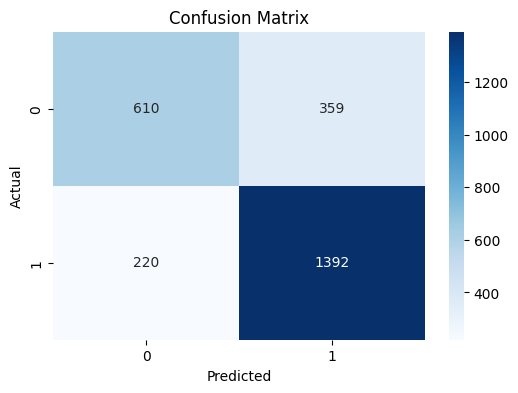

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = df_new_3.drop(columns=['DiagPeriodL90D'])
y = df_new_3['DiagPeriodL90D']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Apply random oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Initialize model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on oversampled data
model.fit(X_train_ros, y_train_ros)

# Predict on original test set
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
import numpy as np
print("Class distribution after Oversample:", np.bincount(y_train_ros))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Alain's models

I used ADASYN and SMOTE as previously seen in the above cells. But I wasn't getting very high results either. My issue was that despite the oversampling techniques, the support for Class 0 wasn't going any higher, showcasing our class imbalance. I used SMOTE-ENN and scaling for our stacking model with XGBoost and Random Forest. I also tried (by accident) doing PCA on top of our already PCA dataset, to see what would happen. It decreased our performance because of PCA taking out those meaningful patterns.

In [ ]:
df = pd.read_csv("df_preprocessed_scaled_pca.csv")
df.head(5)

# quick glance

,patient_race,payer_type,patient_state,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,...,race_pacific,race_other,hispanic,disabled,limited_english,health_uninsured,poverty_percentage,older_age_percentage,low_income_percentage,DiagPeriodL90D
0,4,1,4,1.860807,48,41,4,5,0.769819,-0.132136,...,0.402207,3.427583,2.831495,-0.126301,1.162945,0.624209,-0.290164,-0.613445,0.058665,1
1,5,0,4,0.211052,29,3,4,5,1.323201,0.240832,...,0.317505,0.953592,1.144267,-1.187302,0.740685,-0.370669,-0.536364,-0.594690,0.022215,1
2,5,0,43,-1.213736,18,3,2,9,0.089909,-0.322038,...,0.014459,-0.298497,0.053482,-0.564948,-0.231200,1.544111,-0.439256,-0.468231,0.042931,1
3,5,0,4,-1.063758,22,3,4,5,0.867587,0.106084,...,0.223391,-0.040699,-0.102301,-1.217755,0.166635,-0.992416,-0.532865,-0.522824,0.027755,0
4,4,0,13,-0.313870,7,3,4,3,-0.710222,-0.493744,...,-0.061961,-0.096447,-0.300905,0.525551,-0.522847,0.835469,-0.121637,-0.026206,0.100696,0


In [ ]:
numerical_columns = ['patient_age', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'married', 'widowed', 'family_size',
       'income_household_median', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'education_less_highschool', 'education_college_or_above',
       'labor_force_participation', 'unemployment_rate', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'hispanic', 'disabled', 'limited_english', 'health_uninsured', 'poverty_percentage', 'older_age_percentage']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define features and labels
X = df.drop(columns=['DiagPeriodL90D'])  # drop target column
y = df['DiagPeriodL90D']                 # target column

# Step 2: Apply PCA to scaled features
pca = PCA(n_components=0.95)  # retain 95% of variance
X_pca = pca.fit_transform(X)

print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

# Step 3: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Train logistic regression
model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

PCA reduced features from 41 to 4
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       969
           1       0.80      0.76      0.78      1612

    accuracy                           0.73      2581
   macro avg       0.72      0.72      0.72      2581
weighted avg       0.74      0.73      0.73      2581

Accuracy: 0.7315
Precision: 0.7986
Recall: 0.7624
F1 Score: 0.7801


PCA reduced features from 41 to 4
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       969
           1       0.80      0.69      0.74      1612

    accuracy                           0.70      2581
   macro avg       0.69      0.70      0.69      2581
weighted avg       0.72      0.70      0.70      2581

Accuracy: 0.7001
Precision: 0.8027
Recall: 0.6892
F1 Score: 0.7417


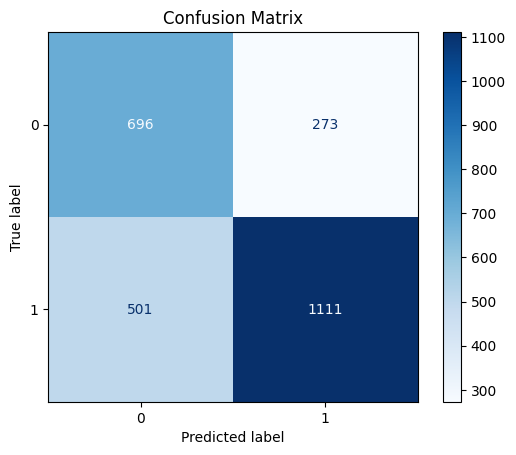

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, accuracy_score,
                             precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

# Step 1: Define features and labels
X = df.drop(columns=['DiagPeriodL90D'])  # drop target column
y = df['DiagPeriodL90D']                 # target column

# Step 2: Apply PCA to scaled features
pca = PCA(n_components=0.95)  # retain 95% of variance
X_pca = pca.fit_transform(X)

print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

# Step 3: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Step 5: Train logistic regression
model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from collections import Counter

print("Original training label distribution:", Counter(y_train))
print("After ADASYN:", Counter(y_train_resampled))

Original training label distribution: Counter({1: 6447, 0: 3874})
After ADASYN: Counter({1: 6447, 0: 6252})


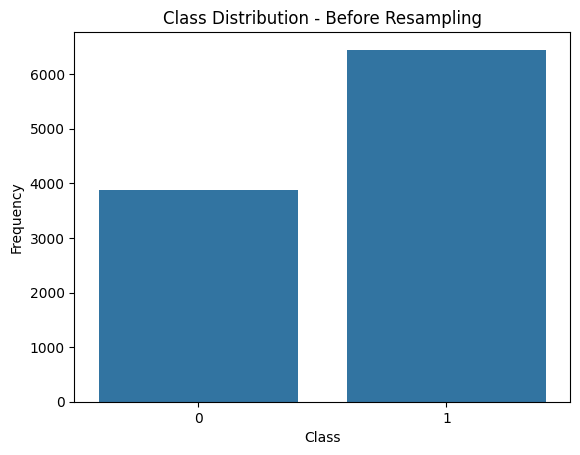

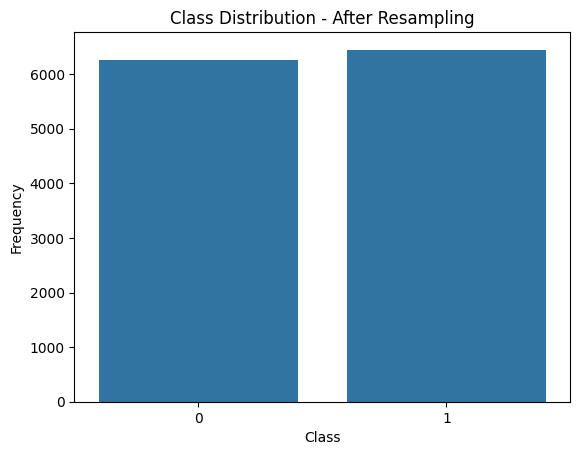

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def plot_class_distribution(y_vals, title):
    counter = Counter(y_vals)
    labels, counts = zip(*counter.items())
    sns.barplot(x=list(labels), y=list(counts))
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

# Before resampling
plot_class_distribution(y_train, "Class Distribution - Before Resampling")

# After resampling
plot_class_distribution(y_train_resampled, "Class Distribution - After Resampling")


PCA reduced features from 41 to 4


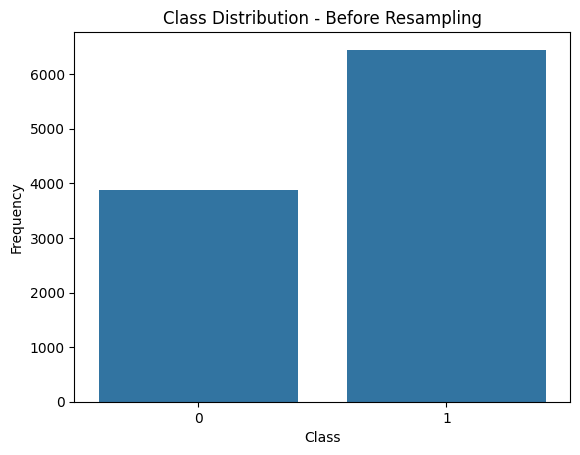

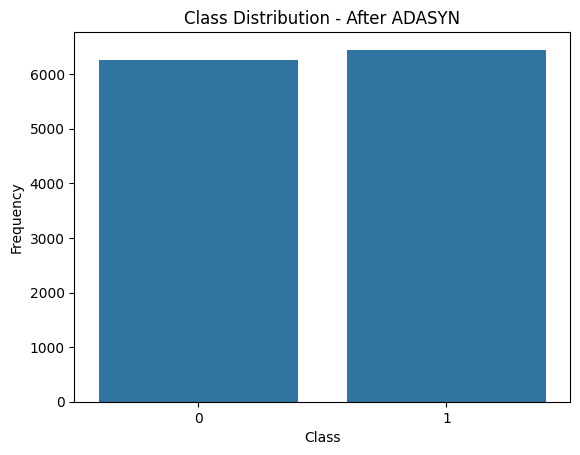

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       969
           1       0.80      0.69      0.74      1612

    accuracy                           0.70      2581
   macro avg       0.69      0.70      0.69      2581
weighted avg       0.72      0.70      0.70      2581

Accuracy: 0.7001
Precision: 0.8027
Recall: 0.6892
F1 Score: 0.7417


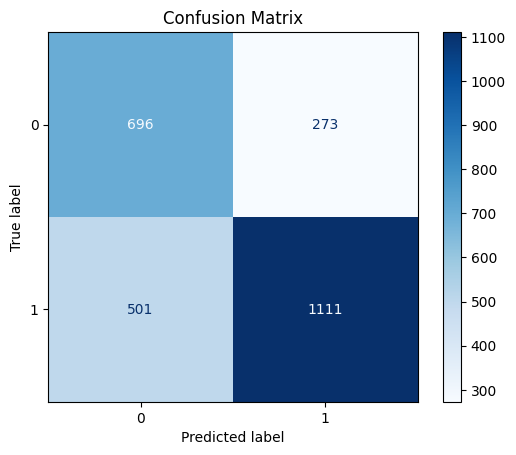

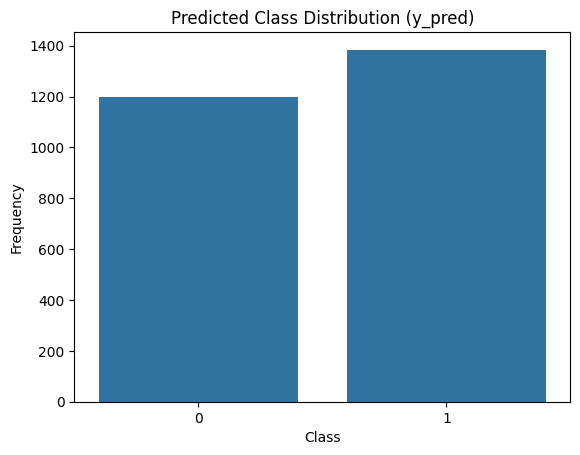

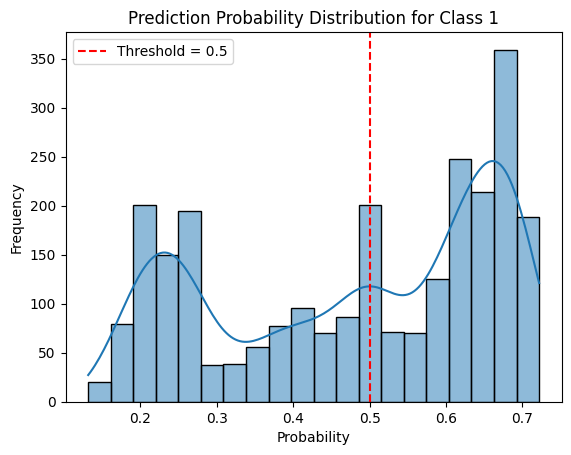

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, accuracy_score,
                             precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from imblearn.over_sampling import ADASYN

# --- Load & Prepare Data ---
# Assuming df is already loaded and preprocessed

# Step 1: Define features and labels
X = df.drop(columns=['DiagPeriodL90D'])
y = df['DiagPeriodL90D']

# Step 2: Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# --- Visualize class distribution before ADASYN ---
def plot_class_distribution(y_vals, title):
    counter = Counter(y_vals)
    labels, counts = zip(*counter.items())
    sns.barplot(x=list(labels), y=list(counts))
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

plot_class_distribution(y_train, "Class Distribution - Before Resampling")

# Step 4: Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

plot_class_distribution(y_train_resampled, "Class Distribution - After ADASYN")

# Step 5: Train logistic regression
model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 7: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Predicted class distribution
plot_class_distribution(y_pred, "Predicted Class Distribution (y_pred)")

# Prediction probability distribution
sns.histplot(y_prob, bins=20, kde=True)
plt.title("Prediction Probability Distribution for Class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.show()


PCA reduced features from 41 to 4


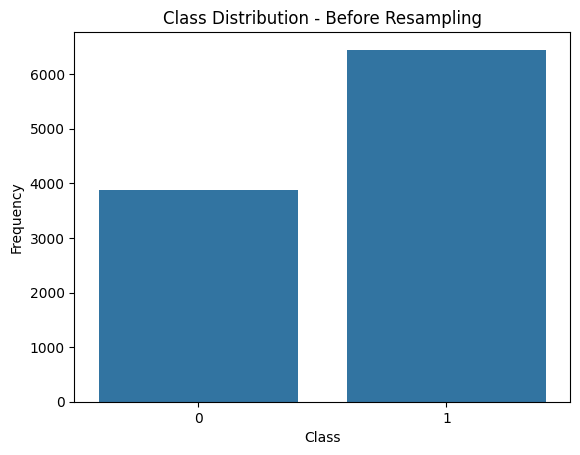

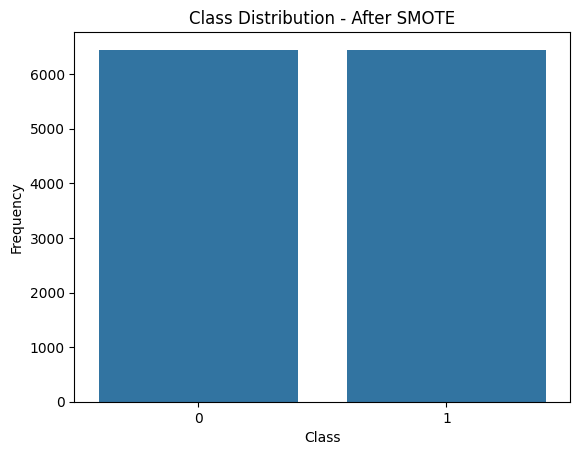

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       969
           1       0.80      0.76      0.78      1612

    accuracy                           0.73      2581
   macro avg       0.71      0.72      0.72      2581
weighted avg       0.74      0.73      0.73      2581

Accuracy: 0.7303
Precision: 0.7986
Recall: 0.7599
F1 Score: 0.7788


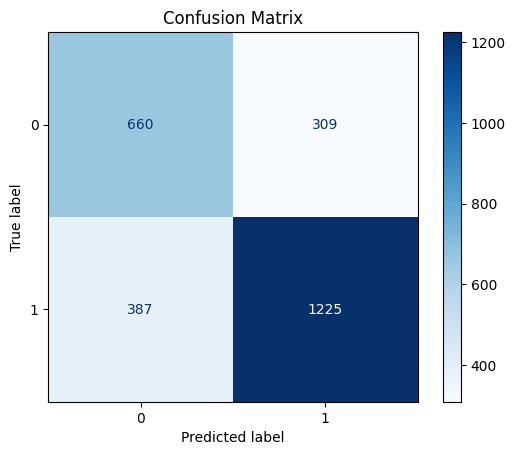

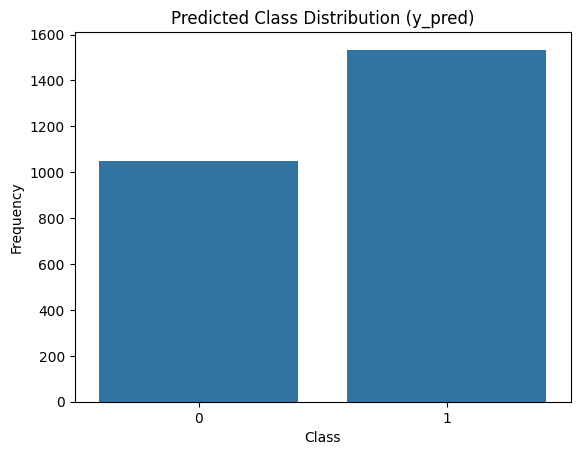

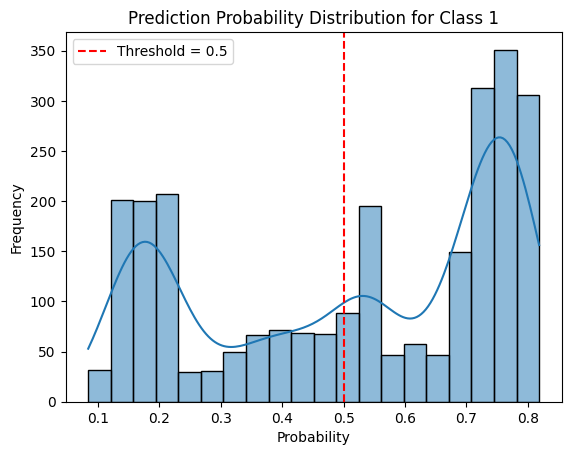

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, accuracy_score,
                             precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from imblearn.over_sampling import SMOTE



# Step 1: Define features and labels
X = df.drop(columns=['DiagPeriodL90D'])
y = df['DiagPeriodL90D']

# Step 2: Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# --- Visualize class distribution before SMOTE ---
def plot_class_distribution(y_vals, title):
    counter = Counter(y_vals)
    labels, counts = zip(*counter.items())
    sns.barplot(x=list(labels), y=list(counts))
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

plot_class_distribution(y_train, "Class Distribution - Before Resampling")

# Step 4: Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

plot_class_distribution(y_train_resampled, "Class Distribution - After SMOTE")

# Step 5: Train logistic regression
model = LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 7: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Predicted class distribution
plot_class_distribution(y_pred, "Predicted Class Distribution (y_pred)")

# Prediction probability distribution
sns.histplot(y_prob, bins=20, kde=True)
plt.title("Prediction Probability Distribution for Class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.show()


In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_prob >= 0.3).astype(int)  # its one or the other

print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


ValueError: X has 41 features, but LogisticRegression is expecting 4 features as input.

In [ ]:
print("Class 0 recall:", recall_score(y_test, y_pred_adjusted, pos_label=0))
print("Class 0 precision:", precision_score(y_test, y_pred_adjusted, pos_label=0))


Class 0 recall: 0.7533539731682146
Class 0 precision: 0.5375552282768777


PCA reduced features from 41 to 4


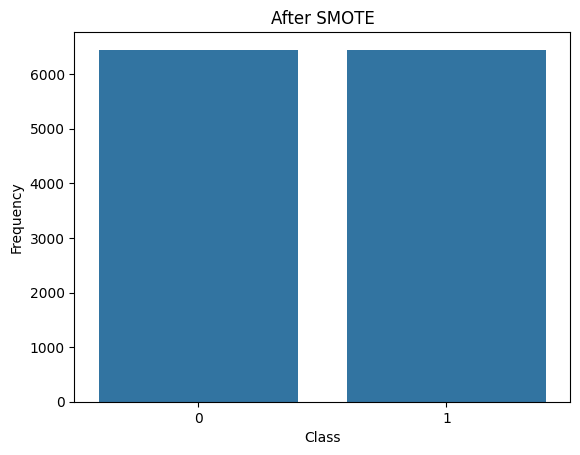

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       969
           1       0.79      0.87      0.83      1612

    accuracy                           0.78      2581
   macro avg       0.77      0.75      0.75      2581
weighted avg       0.77      0.78      0.77      2581

Accuracy: 0.7776
Precision: 0.7946
Recall: 0.8685
F1 Score: 0.8299


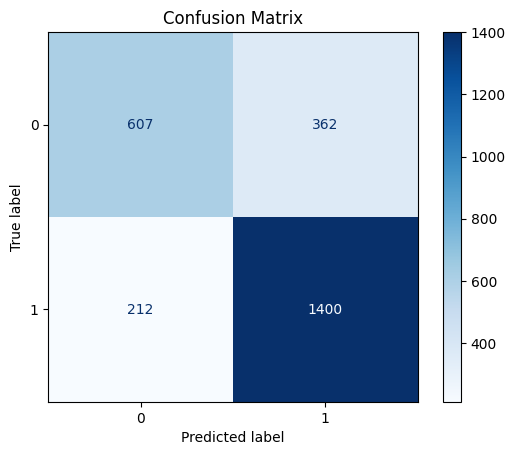

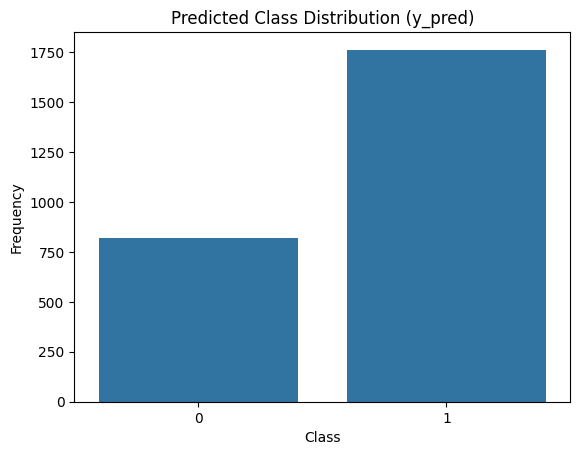

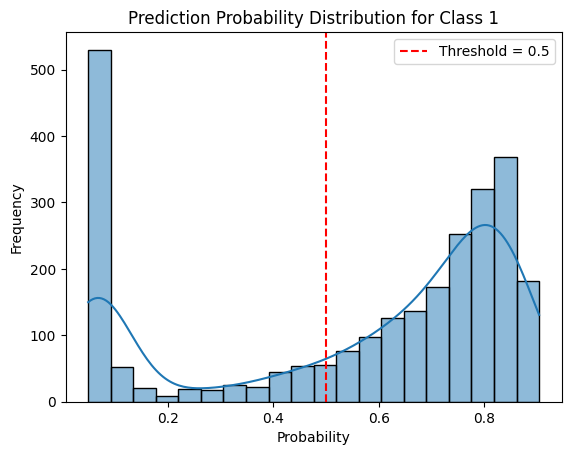

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# --- Step 1: Define features and labels ---
X = df.drop(columns=['DiagPeriodL90D'])
y = df['DiagPeriodL90D']

# --- Step 2: Apply PCA ---
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

# --- Step 3: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# --- Step 4: Apply SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- Plotting function ---
def plot_class_distribution(y_vals, title):
    counter = Counter(y_vals)
    labels, counts = zip(*counter.items())
    sns.barplot(x=list(labels), y=list(counts))
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

plot_class_distribution(y_train_resampled, "After SMOTE")

# --- Step 5: Build stacking classifier ---
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,  # allows meta-learner to also use original features
    cv=5,
    n_jobs=-1
)

# --- Step 6: Train stacked model ---
stack_model.fit(X_train_resampled, y_train_resampled)

# --- Step 7: Predict ---
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:, 1]

# --- Step 8: Evaluation ---
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# --- Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# --- Predicted class distribution ---
plot_class_distribution(y_pred, "Predicted Class Distribution (y_pred)")

# --- Prediction probability distribution ---
sns.histplot(y_prob, bins=20, kde=True)
plt.title("Prediction Probability Distribution for Class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.show()


## HIGHEST PERFORMANCE; STACKING

Class distribution after SMOTEENN: Counter({0: 4038, 1: 3268})

Evaluating Stacked Model with SMOTEENN:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       808
           1       0.96      0.97      0.97       654

    accuracy                           0.97      1462
   macro avg       0.97      0.97      0.97      1462
weighted avg       0.97      0.97      0.97      1462



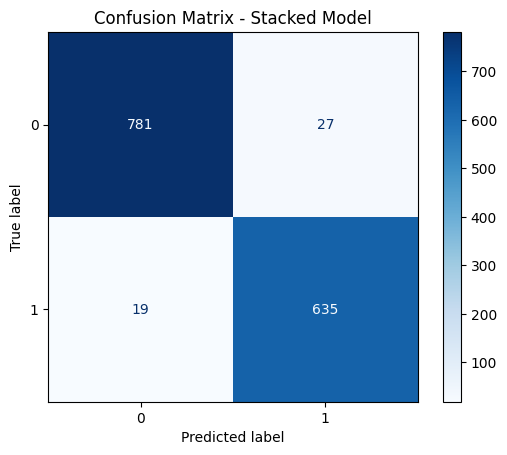

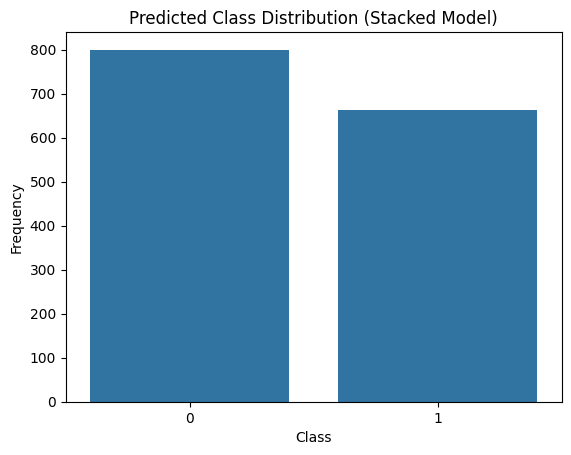

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTEENN
from collections import Counter
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 0: Define features and target from your DataFrame (df) ---
X = df.drop(columns=['DiagPeriodL90D'])
y = df['DiagPeriodL90D']

# --- Step 1: Standard scaling (important before SMOTEENN or PCA) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 2: Apply SMOTEENN to training data ---
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y)
print("Class distribution after SMOTEENN:", Counter(y_resampled))

# --- Step 3: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# --- Step 4: Define base models for stacking ---
base_models = [
    ('xgb', xgb.XGBClassifier(
        objective="binary:logistic", eval_metric="logloss", use_label_encoder=False,
        random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# --- Step 5: Meta-classifier ---
meta_model = LogisticRegression(max_iter=1000)

# --- Step 6: Stacking model ---
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    n_jobs=-1
)

# --- Step 7: Fit model ---
stacking_model.fit(X_train, y_train)

# --- Step 8: Evaluate ---
predictions = stacking_model.predict(X_test)
print("\nEvaluating Stacked Model with SMOTEENN:")
print(classification_report(y_test, predictions))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stacked Model")
plt.show()

# --- Predicted class distribution ---
def plot_class_distribution(y_vals, title):
    counter = Counter(y_vals)
    labels, counts = zip(*counter.items())
    sns.barplot(x=list(labels), y=list(counts))
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

plot_class_distribution(predictions, "Predicted Class Distribution (Stacked Model)")


Why PCA can be detrimental: because it potentially takes out meaningful patterns in which our model needs to learn

PCA reduced features from 41 to 24
Class distribution after SMOTEENN: Counter({0: 4103, 1: 3286})

Evaluating Stacked Model with PCA + SMOTEENN:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       821
           1       0.94      0.95      0.95       657

    accuracy                           0.95      1478
   macro avg       0.95      0.95      0.95      1478
weighted avg       0.95      0.95      0.95      1478



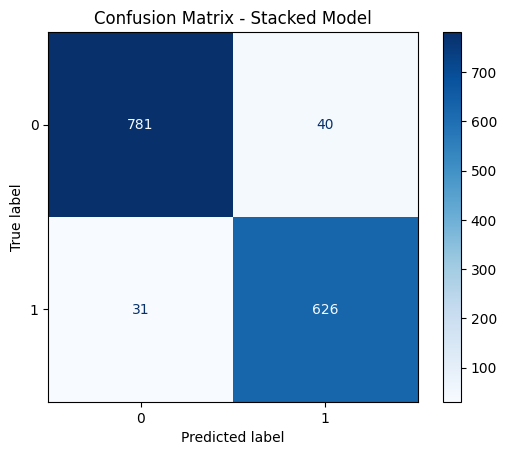

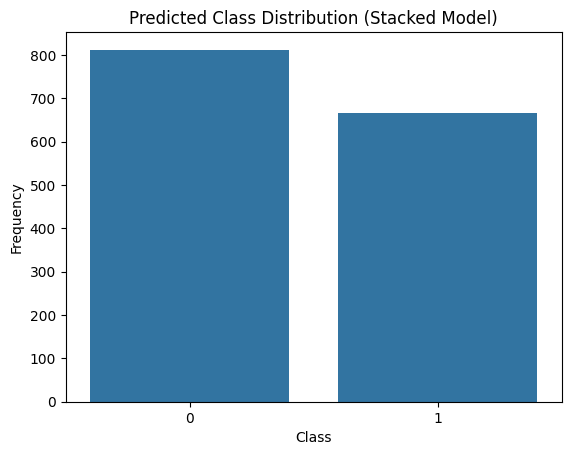

In [ ]:
from sklearn.decomposition import PCA

# --- Step 0: Features and target ---
X = df.drop(columns=['DiagPeriodL90D'])
y = df['DiagPeriodL90D']

# --- Step 1: Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 2: PCA (retain 95% variance) ---
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

# --- Step 3: SMOTEENN ---
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_pca, y)
print("Class distribution after SMOTEENN:", Counter(y_resampled))

# --- Step 4: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# --- Step 5: Define base models ---
base_models = [
    ('xgb', xgb.XGBClassifier(
        objective="binary:logistic", eval_metric="logloss", use_label_encoder=False, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# --- Step 6: Meta-model ---
meta_model = LogisticRegression(max_iter=1000)

# --- Step 7: Stacking ---
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    n_jobs=-1
)

# --- Step 8: Fit ---
stacking_model.fit(X_train, y_train)

# --- Step 9: Evaluate ---
predictions = stacking_model.predict(X_test)
print("\nEvaluating Stacked Model with PCA + SMOTEENN:")
print(classification_report(y_test, predictions))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stacked Model")
plt.show()

# --- Prediction distribution ---
plot_class_distribution(predictions, "Predicted Class Distribution (Stacked Model)")


PCA reduced features from 41 to 4


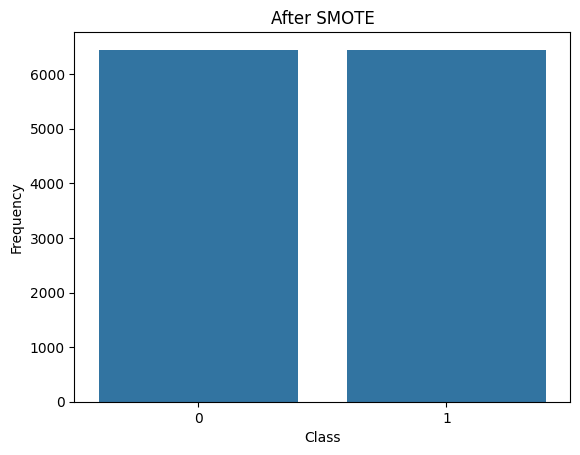

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       969
           1       0.79      0.87      0.83      1612

    accuracy                           0.78      2581
   macro avg       0.77      0.75      0.75      2581
weighted avg       0.77      0.78      0.77      2581

Accuracy: 0.7776
Precision: 0.7949
Recall: 0.8679
F1 Score: 0.8298


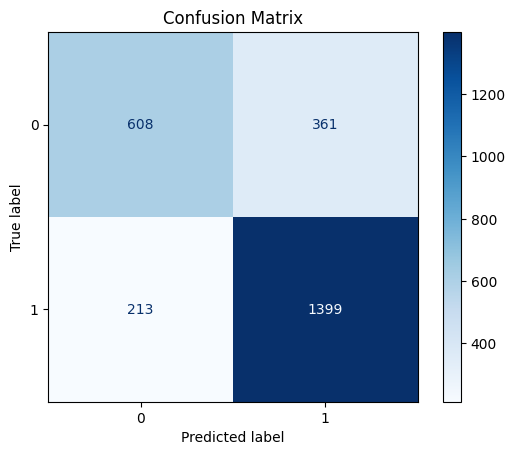

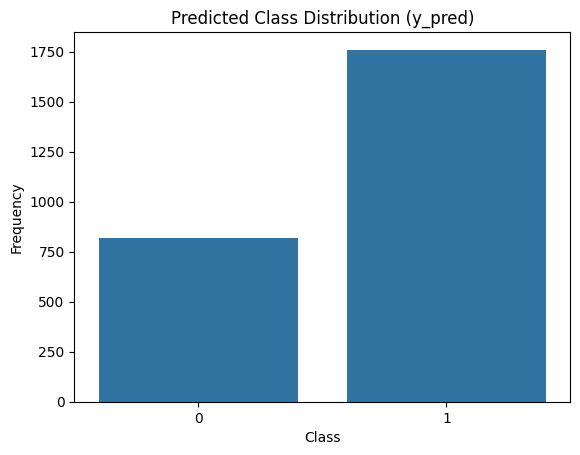

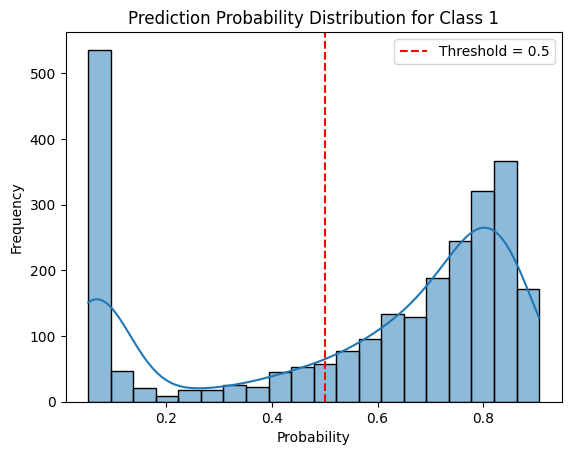

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# --- Step 1: Define features and labels ---
X = df.drop(columns=['DiagPeriodL90D'])
y = df['DiagPeriodL90D']

# --- Step 2: Apply PCA ---
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

# --- Step 3: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# --- Step 4: Apply SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- Plotting function ---
def plot_class_distribution(y_vals, title):
    counter = Counter(y_vals)
    labels, counts = zip(*counter.items())
    sns.barplot(x=list(labels), y=list(counts))
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

plot_class_distribution(y_train_resampled, "After SMOTE")

# --- Step 5: Build stacking classifier ---
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,  # allows meta-learner to also use original features
    cv=5,
    n_jobs=-1
)

# --- Step 6: Train stacked model ---
stack_model.fit(X_train_resampled, y_train_resampled)

# --- Step 7: Predict ---
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:, 1]

# --- Step 8: Evaluation ---
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# --- Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# --- Predicted class distribution ---
plot_class_distribution(y_pred, "Predicted Class Distribution (y_pred)")

# --- Prediction probability distribution ---
sns.histplot(y_prob, bins=20, kde=True)
plt.title("Prediction Probability Distribution for Class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.show()
